<h1> STAR TYPE CLASSIFICATION </h1>

# <h1> 1. INSTALLING NECESSARY PYTHON LIBRARIES </h1>

In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install statsmodels
%pip install bioinfokit


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [2]:
import sys
import numpy as np # generic mathematics
import pandas as pd # handling tabular data
import matplotlib.pyplot as plt # basic plots
import seaborn as sns # more complex plots
from statsmodels.multivariate.pca import PCA

import warnings
warnings.filterwarnings(action='ignore')

<h1> 2.DATASET </h1>

<h2> 2.1 UNDERSTANDING FEATURES IN THE DATASET </h2>


1. Absolute Temperature (in K)
2. Relative Luminosity (L/Lo)
3. Relative Radius (R/Ro)
4. Absolute Magnitude (Mv)
5. Star Color (white,Red,Blue,Yellow,yellow-orange etc)
6. Spectral Class (O,B,A,F,G,K,,M)
7. Star Type **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)**


Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)


Ro = 6.9551 x 10^8 m (Avg Radius of Sun)


<h2> 2.2 LOADING THE DATASET </h2>

In [3]:
df = pd.read_csv(r"C:\Users\littl\Downloads\6 class csv.csv")

df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class,Star type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


<h2> 2.3 ENCODING </h2>

In [4]:
replaceFeature = {
                  'White': 0,
                  'white': 0,
                  'Whitish':0,
                  'Red':1,
                  'Blue':2,
                  'Blue ':2,
                  'Blue White':3,
                  'Blue white ':3,
                  'Blue white':3,
                  'Blue-white':3,
                  'Blue-White':3,
                  'Yellowish White':4,
                  'yellow-white':4,
                  'White-Yellow':4,
                  'yellowish':4,
                  'Yellowish':4,
                  'Orange-Red':5,
                  'Orange':5,
                  'Pale yellow orange':5,
                  'O': 0,
                  'B':1,
                  'A': 2,
                  'F':3,
                  'G':4,
                  'K':5,
                  'M':6,
  
                  }
replaceType = {   
                  0:'Brown Dwarf',
                  1:'Red Dwarf',
                  2:'White Dwarf',
                  3:'Main Sequence',
                  4:'Supergiant',
                  5:'Hypergiant'
  
                  }

for key, value in replaceFeature.items():
    df.replace(key, value, inplace=True)
for key, value in replaceType.items():
    df['Star type'].replace(key, value, inplace=True)
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class,Star type
0,3068,0.002400,0.1700,16.12,1,6,Brown Dwarf
1,3042,0.000500,0.1542,16.60,1,6,Brown Dwarf
2,2600,0.000300,0.1020,18.70,1,6,Brown Dwarf
3,2800,0.000200,0.1600,16.65,1,6,Brown Dwarf
4,1939,0.000138,0.1030,20.06,1,6,Brown Dwarf
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,2,0,Hypergiant
236,30839,834042.000000,1194.0000,-10.63,2,0,Hypergiant
237,8829,537493.000000,1423.0000,-10.73,0,2,Hypergiant
238,9235,404940.000000,1112.0000,-11.23,0,2,Hypergiant


<h2> 2.4 INITIAL ANALYSIS ON THE DATASET </h2>

In [5]:
new_columns = ["Absolute Temperature", "Relative Luminous Intensity", "Relative Radius", "Absolute Magnitude", "Star Colour", "Spectral Class", "Star Type"]

In [6]:
df.columns=new_columns

In [7]:
df.head()

,Absolute Temperature,Relative Luminous Intensity,Relative Radius,Absolute Magnitude,Star Colour,Spectral Class,Star Type
0,3068,0.002400,0.1700,16.12,1,6,Brown Dwarf
1,3042,0.000500,0.1542,16.60,1,6,Brown Dwarf
2,2600,0.000300,0.1020,18.70,1,6,Brown Dwarf
3,2800,0.000200,0.1600,16.65,1,6,Brown Dwarf
4,1939,0.000138,0.1030,20.06,1,6,Brown Dwarf


In [8]:
print("Shape of Dataset:", df.shape)

Shape of Dataset: (240, 7)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Absolute Temperature         240 non-null    int64  
 1   Relative Luminous Intensity  240 non-null    float64
 2   Relative Radius              240 non-null    float64
 3   Absolute Magnitude           240 non-null    float64
 4   Star Colour                  240 non-null    int64  
 5   Spectral Class               240 non-null    int64  
 6   Star Type                    240 non-null    object 
dtypes: float64(3), int64(3), object(1)
memory usage: 13.3+ KB


<h3> 2.4.1 Analysis Output </h3>

1. The Data Set consists of 240 Rows and 7 Columns.

2. The type of all the variables in the data set are in numerical format. (Integer Or Float).

3. According to first impressions, there are no missing value(NaN Value) in the data set.

<h2> 2.5 MISSING VALUES ANALYSIS </h2>

In [10]:
df.isnull().sum()

Absolute Temperature           0
Relative Luminous Intensity    0
Relative Radius                0
Absolute Magnitude             0
Star Colour                    0
Spectral Class                 0
Star Type                      0
dtype: int64

In [11]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
Absolute Temperature,0
Relative Luminous Intensity,0
Relative Radius,0
Absolute Magnitude,0
Star Colour,0
Spectral Class,0
Star Type,0


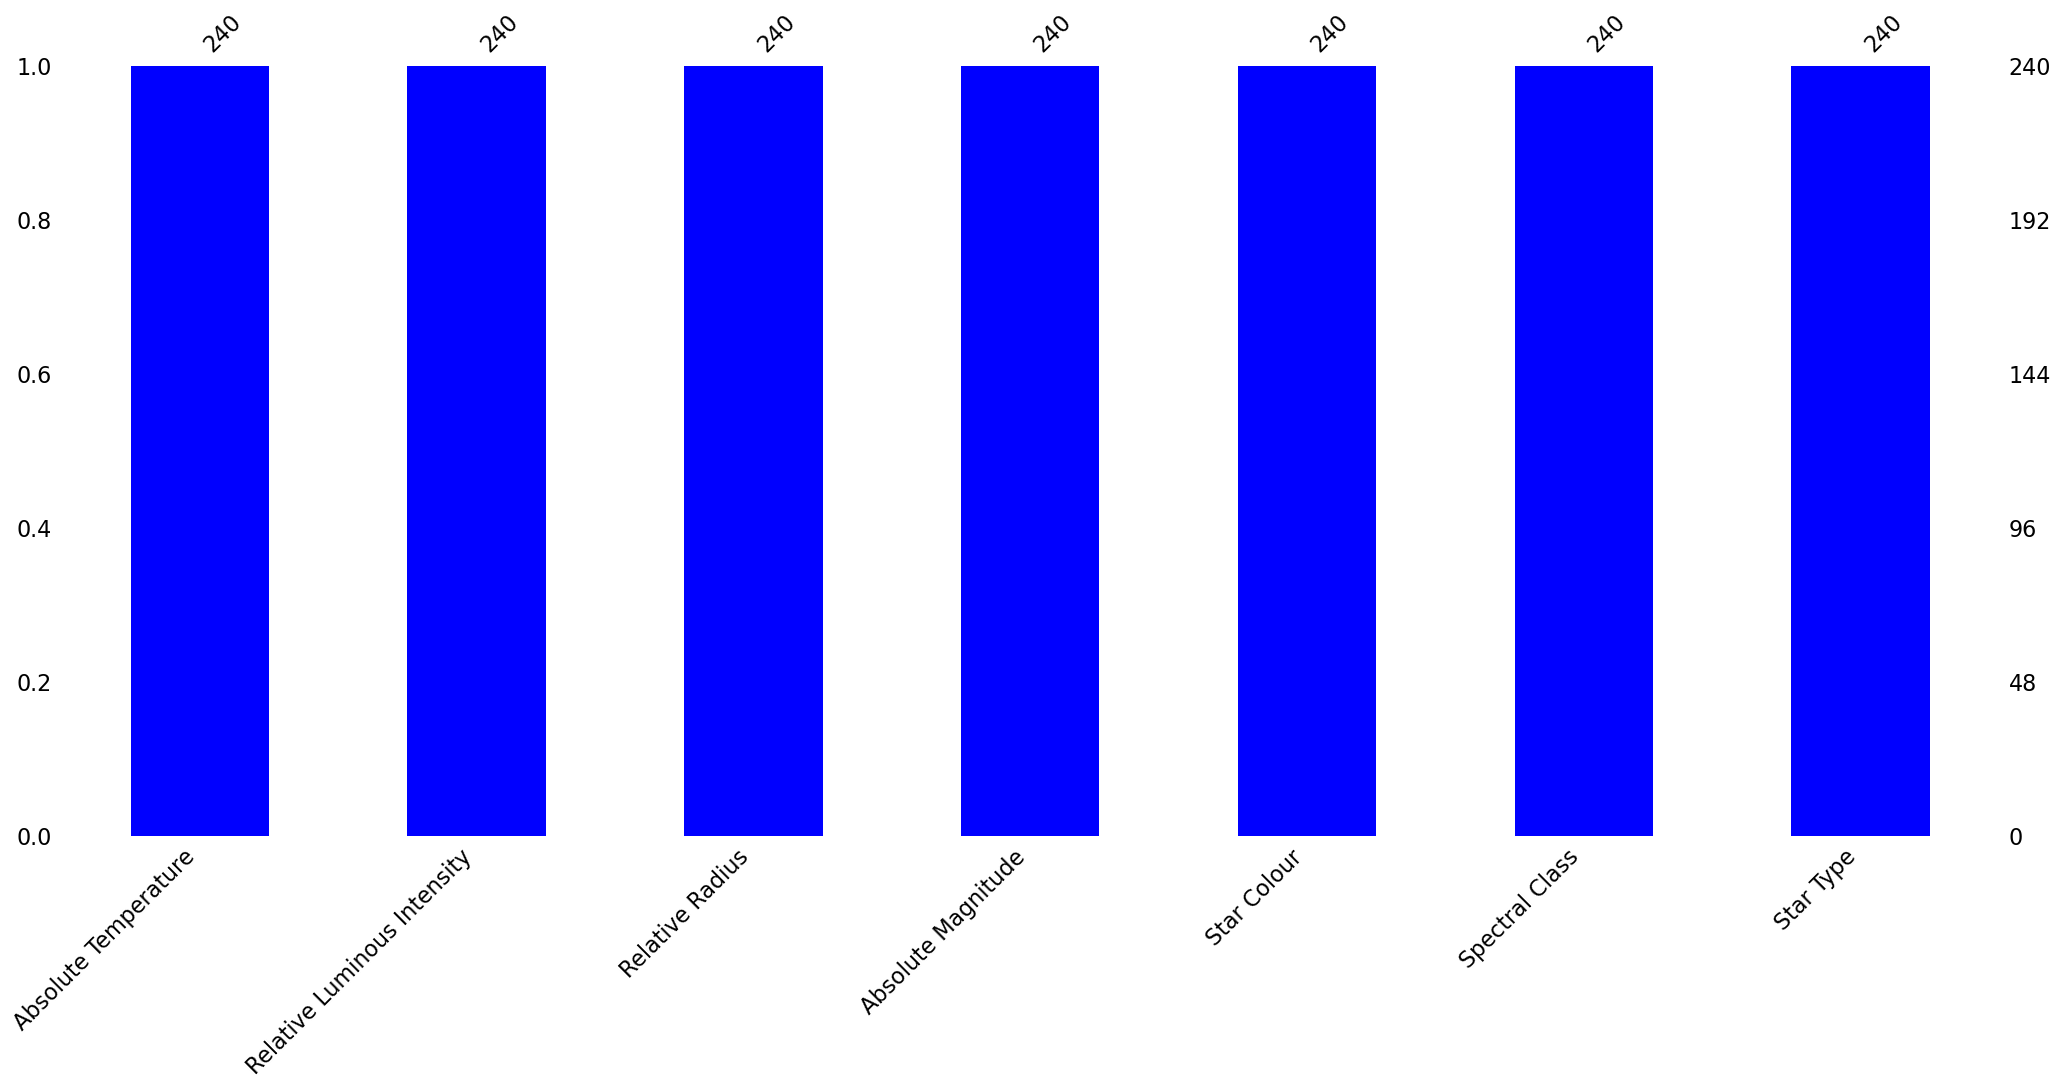

In [12]:
import missingno
missingno.bar(df, color = "b")
plt.show()

In [13]:
df.head()

,Absolute Temperature,Relative Luminous Intensity,Relative Radius,Absolute Magnitude,Star Colour,Spectral Class,Star Type
0,3068,0.002400,0.1700,16.12,1,6,Brown Dwarf
1,3042,0.000500,0.1542,16.60,1,6,Brown Dwarf
2,2600,0.000300,0.1020,18.70,1,6,Brown Dwarf
3,2800,0.000200,0.1600,16.65,1,6,Brown Dwarf
4,1939,0.000138,0.1030,20.06,1,6,Brown Dwarf


In [14]:
df["Absolute Temperature"].value_counts()

3600     3
3218     2
2650     2
3625     2
3324     2
        ..
10980    1
13720    1
19860    1
5300     1
37882    1
Name: Absolute Temperature, Length: 228, dtype: int64

In [15]:
df["Absolute Temperature"].value_counts().count()

228

In [16]:
df["Relative Luminous Intensity"].value_counts()

200000.00000    5
0.00067         3
0.00014         3
0.00098         3
0.00050         2
               ..
0.59000         1
0.15300         1
0.08500         1
0.35700         1
294903.00000    1
Name: Relative Luminous Intensity, Length: 208, dtype: int64

In [17]:
df["Relative Luminous Intensity"].value_counts().sum()

240

In [18]:
df["Relative Luminous Intensity"].value_counts().count()

208

In [19]:
df["Relative Radius"].value_counts()

36.0000      3
0.1100       3
1324.0000    3
0.2400       3
83.0000      2
            ..
0.0089       1
0.0109       1
0.0087       1
0.0131       1
1783.0000    1
Name: Relative Radius, Length: 216, dtype: int64

In [20]:
df["Relative Radius"].value_counts().sum()

240

In [21]:
df["Relative Radius"].value_counts().count()

216

In [22]:
df["Absolute Magnitude"].value_counts()

 12.23    3
 11.34    2
-10.70    2
-7.22     2
 14.23    2
         ..
 13.78    1
 12.45    1
 12.17    1
 12.13    1
-7.80     1
Name: Absolute Magnitude, Length: 228, dtype: int64

In [23]:
df["Absolute Magnitude"].value_counts().sum()

240

In [24]:
df["Absolute Magnitude"].value_counts().count()

228

In [25]:
df["Star Colour"].value_counts()

1    112
2     56
3     41
4     15
0     12
5      4
Name: Star Colour, dtype: int64

In [26]:
df["Star Colour"].value_counts().sum()

240

In [27]:
df["Star Colour"].value_counts().sum()

240

In [28]:
df["Spectral Class"].value_counts()

6    111
1     46
0     40
2     19
3     17
5      6
4      1
Name: Spectral Class, dtype: int64

In [29]:
df["Spectral Class"].value_counts().sum()

240

In [30]:
df["Spectral Class"].value_counts().sum()

240

In [31]:
df["Star Type"].value_counts()

Brown Dwarf      40
Red Dwarf        40
White Dwarf      40
Main Sequence    40
Supergiant       40
Hypergiant       40
Name: Star Type, dtype: int64

In [32]:
df["Star Type"].value_counts().sum()

240

In [33]:
df["Star Type"].value_counts().sum()

240

In [34]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)
    
pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
Absolute Temperature,228
Relative Luminous Intensity,208
Relative Radius,216
Absolute Magnitude,228
Star Colour,6
Spectral Class,7
Star Type,6


#### Analysis Outputs(2) <a id = 13></a>
* **According to the result from the unique value dataframe;** 
* We determined the variables with few unique values ​​as categorical variables, and the variables with high unique values ​​as numeric variables.
* In this context, **Numeric Variables:** Absolute Temperature, Relative Luminous Intensity, Relative Radius, Absolute Magnitude.
* **Categorical Variables:** Star Colour, Spectral Class, Star Type. 
* In the next section, we will separate these 2 groups into 2 different lists.

<h2> 2.6 SEPERATING VARIABLES </h2>

In [35]:
numeric_var = ["Absolute Temperature", "Relative Luminous Intensity", "Relative Radius", "Absolute Magnitude"]
categoric_var = ["Star Colour", "Spectral Class", "Star Type"]

<h2> 2.7 NUMERIC VARIABLES </h2>

In [36]:
# We applied the "Describe" method to see the basic statistics of numerical data
df[numeric_var].describe()
# The analyzes we infered from the describe method are below the graphs of each variable below.

,Absolute Temperature,Relative Luminous Intensity,Relative Radius,Absolute Magnitude
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396
std,9552.425037,179432.244940,517.155763,10.532512
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000865,0.102750,-6.232500
50%,5776.000000,0.070500,0.762500,8.313000
75%,15055.500000,198050.000000,42.750000,13.697500
max,40000.000000,849420.000000,1948.500000,20.060000


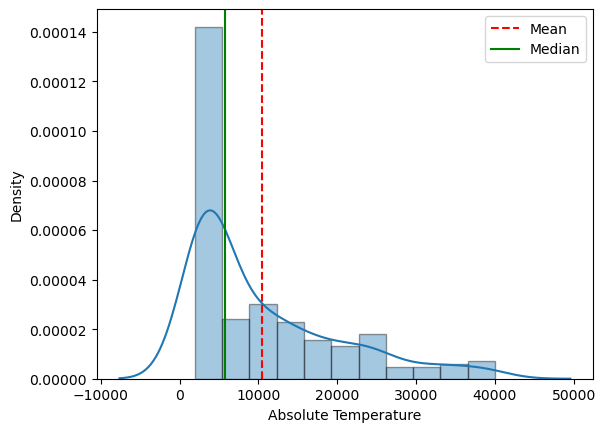

In [37]:
# Plot the distribution with seaborn
sns.distplot(df["Absolute Temperature"], hist_kws=dict(linewidth=1, edgecolor="k"))

# Calculate mean and median
mean_value = df["Absolute Temperature"].mean()
median_value = df["Absolute Temperature"].median()

# Add mean line with a different color
plt.axvline(mean_value, color='r', linestyle='--', label='Mean')

# Add median line with a different color
plt.axvline(median_value, color='g', linestyle='-', label='Median')

# Add legend
plt.legend()

# Show the plot
plt.show()

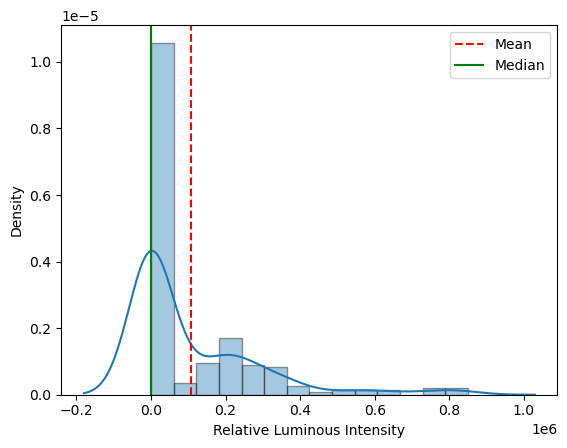

In [38]:
# Plot the distribution with seaborn
sns.distplot(df["Relative Luminous Intensity"], hist_kws=dict(linewidth=1, edgecolor="k"))

# Calculate mean and median
mean_value = df["Relative Luminous Intensity"].mean()
median_value = df["Relative Luminous Intensity"].median()

# Add mean line with a different color
plt.axvline(mean_value, color='r', linestyle='--', label='Mean')

# Add median line with a different color
plt.axvline(median_value, color='g', linestyle='-', label='Median')

# Add legend
plt.legend()

# Show the plot
plt.show()

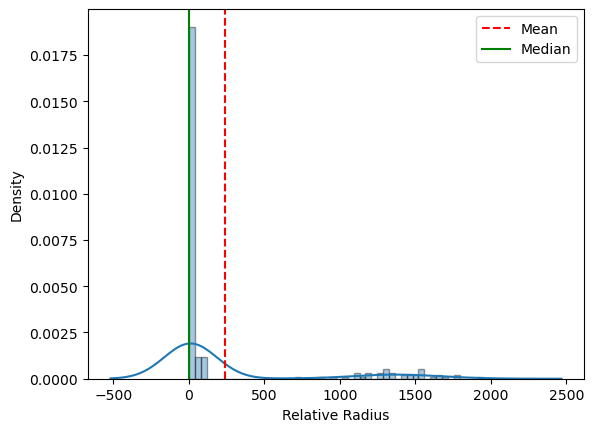

In [39]:
# Plot the distribution with seaborn
sns.distplot(df["Relative Radius"], hist_kws=dict(linewidth=1, edgecolor="k"))

# Calculate mean and median
mean_value = df["Relative Radius"].mean()
median_value = df["Relative Radius"].median()

# Add mean line with a different color
plt.axvline(mean_value, color='r', linestyle='--', label='Mean')

# Add median line with a different color
plt.axvline(median_value, color='g', linestyle='-', label='Median')

# Add legend
plt.legend()

# Show the plot
plt.show()

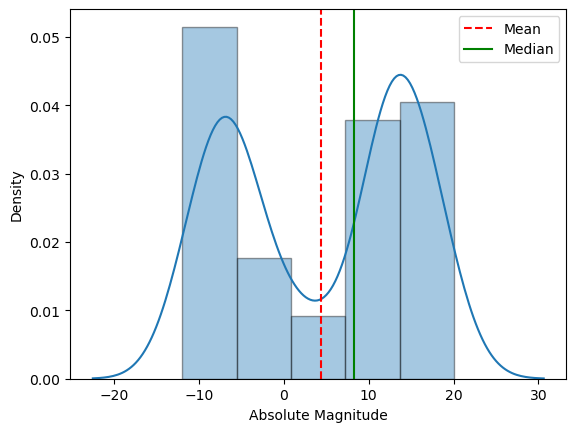

In [40]:
# Plot the distribution with seaborn
sns.distplot(df["Absolute Magnitude"], hist_kws=dict(linewidth=1, edgecolor="k"))

# Calculate mean and median
mean_value = df["Absolute Magnitude"].mean()
median_value = df["Absolute Magnitude"].median()

# Add mean line with a different color
plt.axvline(mean_value, color='r', linestyle='--', label='Mean')

# Add median line with a different color
plt.axvline(median_value, color='g', linestyle='-', label='Median')

# Add legend
plt.legend()

# Show the plot
plt.show()

<h2> 2.7 UNI VARIATE ANALYSIS NUMERIC VARIABLES </h2>

In [41]:
numeric_var 

['Absolute Temperature',
 'Relative Luminous Intensity',
 'Relative Radius',
 'Absolute Magnitude']

In [42]:
numeric_axis_name = ["Absolute Temperature", "Relative Luminous Intensity", "Relative Radius", "Absolute Magnitude"]


In [43]:
list(zip(numeric_var, numeric_axis_name))

[('Absolute Temperature', 'Absolute Temperature'),
 ('Relative Luminous Intensity', 'Relative Luminous Intensity'),
 ('Relative Radius', 'Relative Radius'),
 ('Absolute Magnitude', 'Absolute Magnitude')]

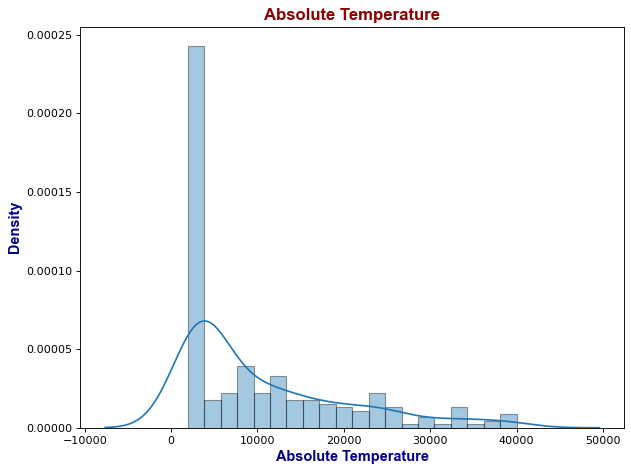

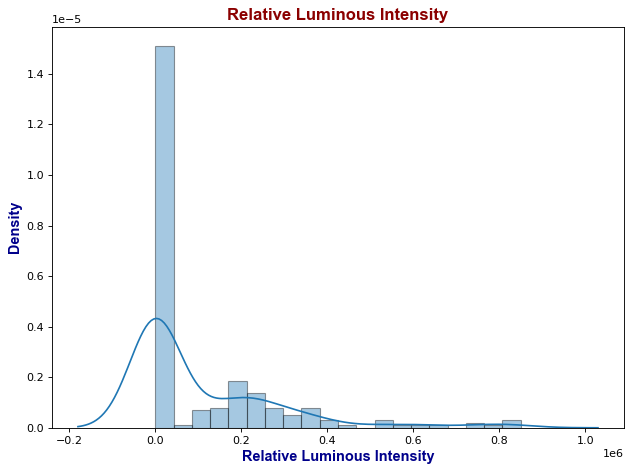

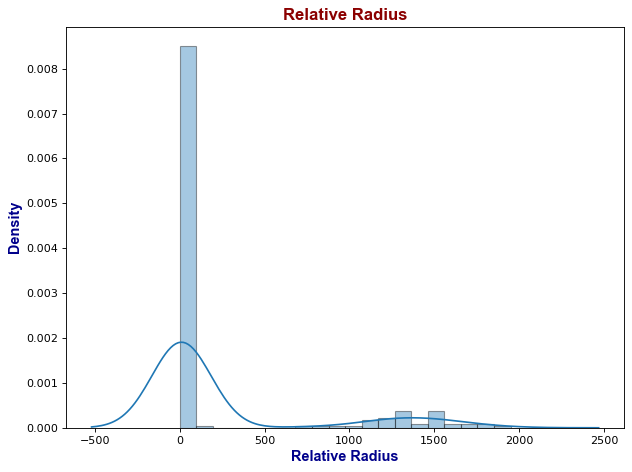

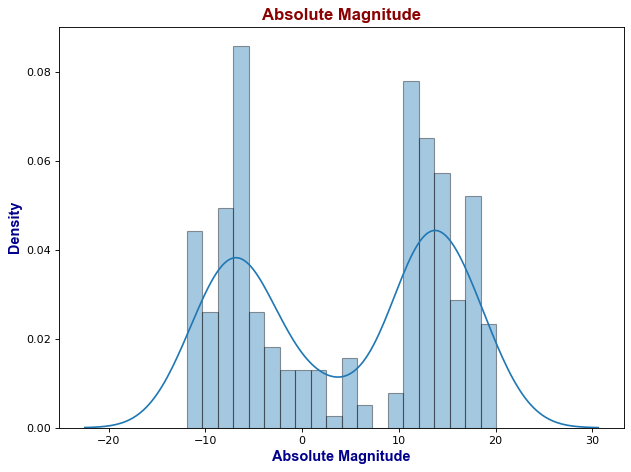

In [44]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

<h2> 2.8 CATEGORICAL VARIABLES </h2>


In [45]:
categoric_var

['Star Colour', 'Spectral Class', 'Star Type']

In [46]:
categoric_axis_name = ["Star Colour", "Spectral Class", "Star Type"]

In [47]:
list(zip(categoric_var, categoric_axis_name))

[('Star Colour', 'Star Colour'),
 ('Spectral Class', 'Spectral Class'),
 ('Star Type', 'Star Type')]

In [48]:
df["Star Colour"].value_counts()


1    112
2     56
3     41
4     15
0     12
5      4
Name: Star Colour, dtype: int64

In [49]:
list(df["Star Colour"].value_counts())


[112, 56, 41, 15, 12, 4]

In [50]:
list(df["Star Colour"].value_counts().index)

[1, 2, 3, 4, 0, 5]

In [51]:
df["Spectral Class"].value_counts()

6    111
1     46
0     40
2     19
3     17
5      6
4      1
Name: Spectral Class, dtype: int64

In [52]:
list(df["Spectral Class"].value_counts())


[111, 46, 40, 19, 17, 6, 1]

In [53]:
list(df["Spectral Class"].value_counts().index)

[6, 1, 0, 2, 3, 5, 4]

In [54]:
df["Star Type"].value_counts()

Brown Dwarf      40
Red Dwarf        40
White Dwarf      40
Main Sequence    40
Supergiant       40
Hypergiant       40
Name: Star Type, dtype: int64

In [55]:
list(df["Star Type"].value_counts())

[40, 40, 40, 40, 40, 40]

In [56]:
list(df["Star Type"].value_counts().index)

['Brown Dwarf',
 'Red Dwarf',
 'White Dwarf',
 'Main Sequence',
 'Supergiant',
 'Hypergiant']

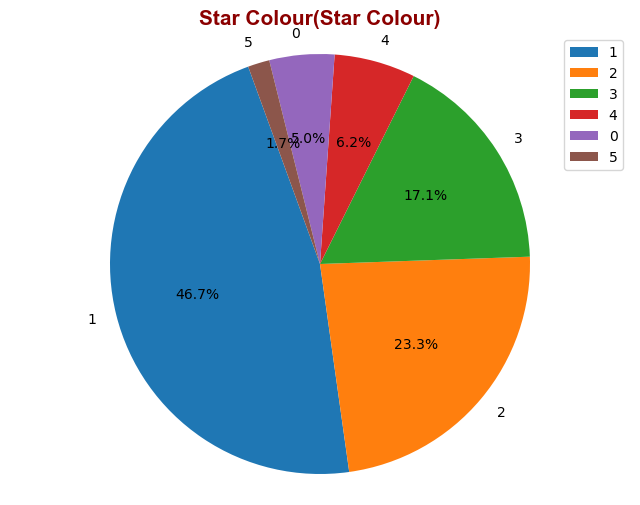

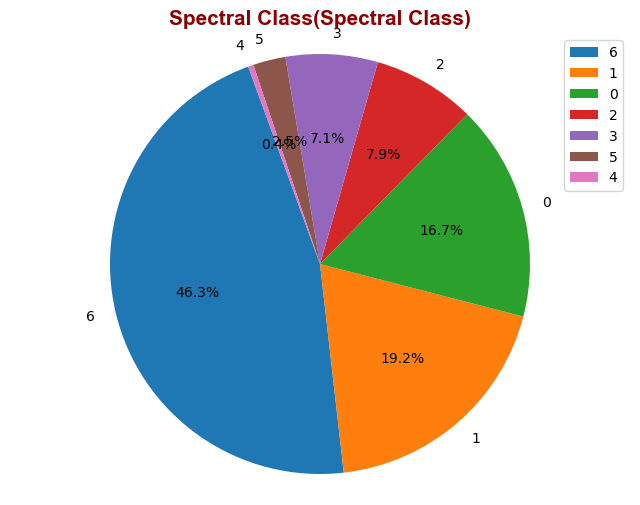

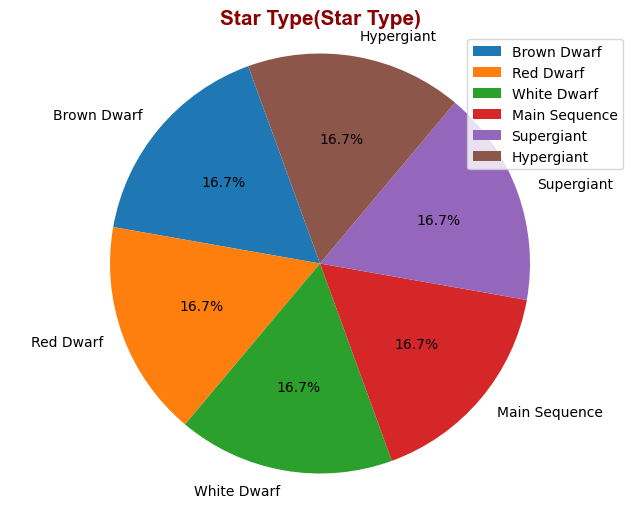

In [57]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (8, 6))
    
    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())
    
    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.title((i + "(" + z + ")"), fontdict = title_font) # Naming Pie Chart Titles
    plt.legend()
    plt.show()

<h2> 2.9 BI VARIATE ANALYSIS OF NUMERIC VARIABLES WITH TARGET VARIABLE </h2>


In [58]:
numeric_var

['Absolute Temperature',
 'Relative Luminous Intensity',
 'Relative Radius',
 'Absolute Magnitude']

In [59]:
numeric_var.append("Star Type")

In [60]:
numeric_var

['Absolute Temperature',
 'Relative Luminous Intensity',
 'Relative Radius',
 'Absolute Magnitude',
 'Star Type']

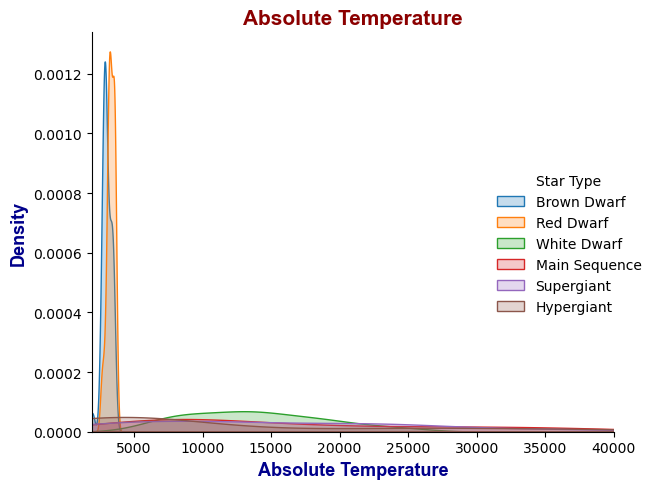

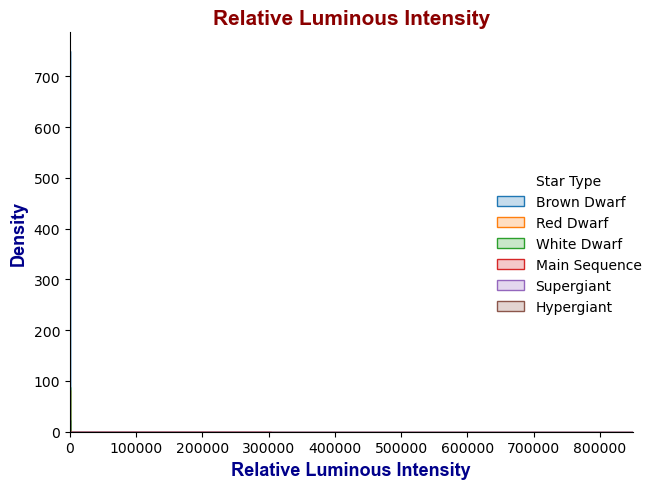

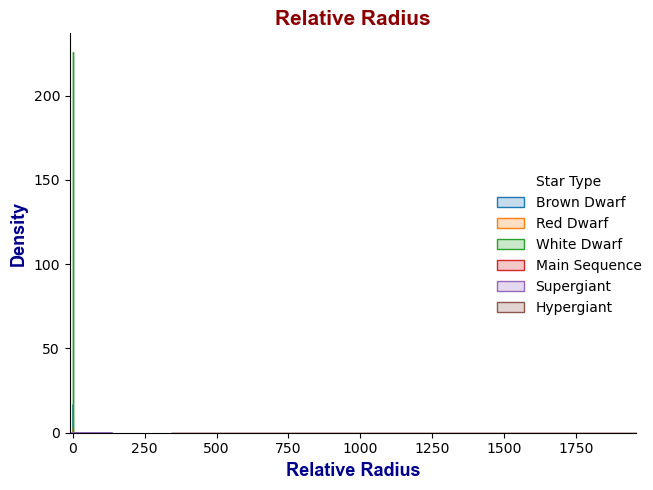

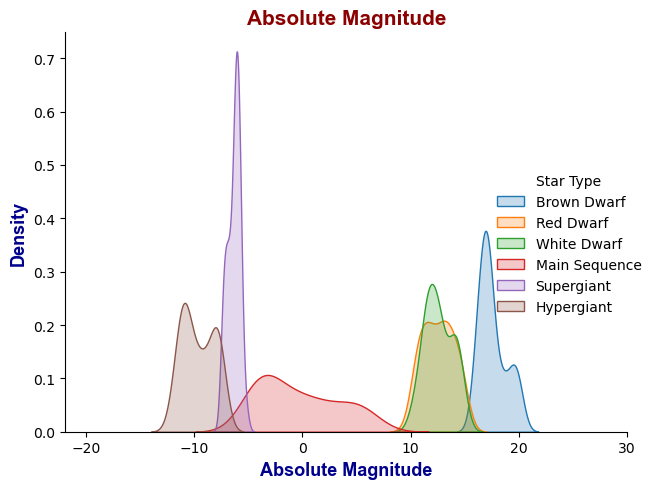

In [61]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    graph = sns.FacetGrid(df[numeric_var], hue = "Star Type", height = 5, xlim = ((df[i].min() - 10), (df[i].max() + 10)))
    graph.map(sns.kdeplot, i, shade = True)
    graph.add_legend()
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

In [62]:
df[numeric_var].corr()

,Absolute Temperature,Relative Luminous Intensity,Relative Radius,Absolute Magnitude
Absolute Temperature,1.000000,0.393404,0.064216,-0.420261
Relative Luminous Intensity,0.393404,1.000000,0.526516,-0.692619
Relative Radius,0.064216,0.526516,1.000000,-0.608728
Absolute Magnitude,-0.420261,-0.692619,-0.608728,1.000000


In [63]:
df[numeric_var].corr().iloc[:, [-1]]

,Absolute Magnitude
Absolute Temperature,-0.420261
Relative Luminous Intensity,-0.692619
Relative Radius,-0.608728
Absolute Magnitude,1.000000


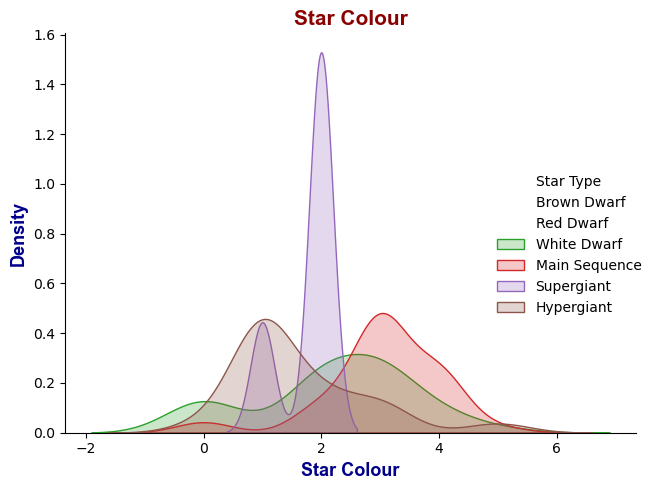

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

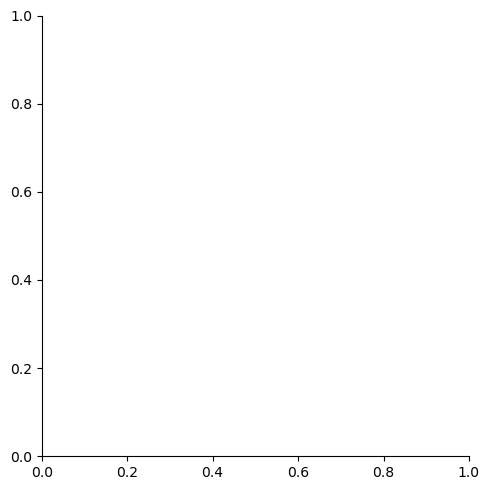

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your categorical variables
categoric_var = ['Star Colour', 'Star Type']  # Replace with your column names
categoric_axis_name = ['Star Colour', 'Star Type']  # Labels for the axes

# Define font styles for title and axis labels
title_font = {"family": "arial", "color": "darkred", "weight": "bold", "size": 15}
axis_font = {"family": "arial", "color": "darkblue", "weight": "bold", "size": 13}

# Iterate through each categorical variable
for i, z in list(zip(categoric_var, categoric_axis_name)):
    # Create a FacetGrid
    graph = sns.FacetGrid(df, hue="Star Type", height=5)
    
    # Map the data onto the grid using a kernel density plot (KDE)
    graph.map(sns.kdeplot, i, shade=True)
    
    # Add legend
    graph.add_legend()
    
    # Set title and axis labels
    plt.title(i, fontdict=title_font)
    plt.xlabel(z, fontdict=axis_font)
    plt.ylabel("Density", fontdict=axis_font)
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


<h2> 2.10 BI VARIATE ANALYSIS OF CATEGORICAL VARIABLES WITH TARGET VARIABLE <h2>

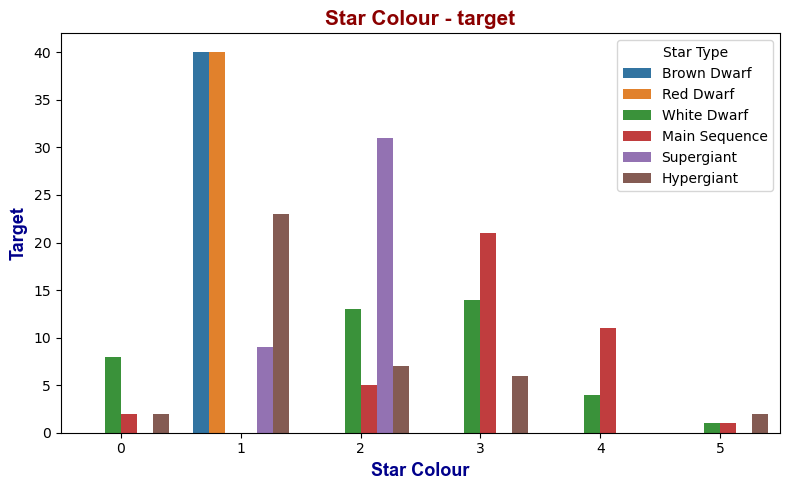

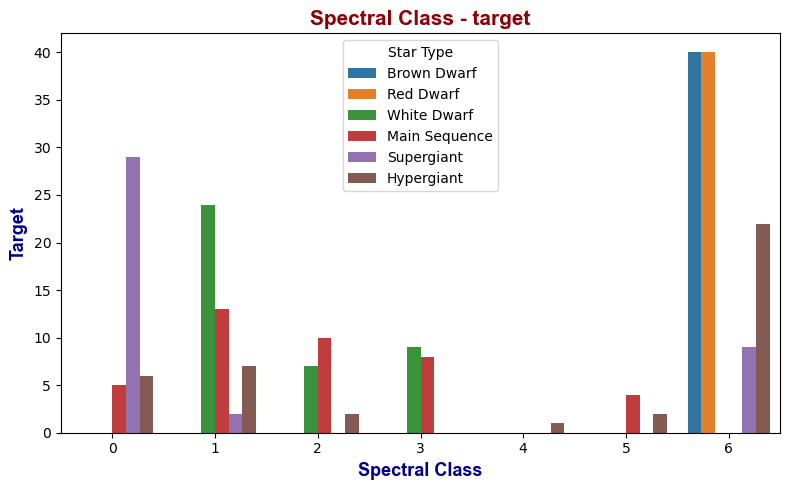

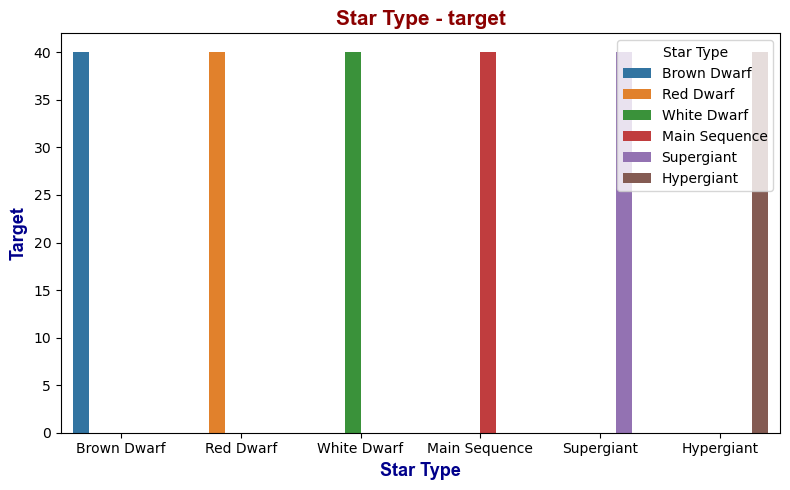

In [64]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    plt.figure(figsize = (8, 5))
    sns.countplot(x=i, data=df, hue="Star Type")

    
    plt.title(i + " - target", fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Target", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

In [65]:
df[categoric_var].corr()

,Star Colour,Spectral Class
Star Colour,1.000000,-0.494037
Spectral Class,-0.494037,1.000000


In [66]:
df[categoric_var].corr().iloc[:, [-1]]

,Spectral Class
Star Colour,-0.494037
Spectral Class,1.000000


<h2> 2.11 EXAMINING NUMERIC VARIABLES AMONG THEMSELVES </h2>

In [67]:
numeric_var

['Absolute Temperature',
 'Relative Luminous Intensity',
 'Relative Radius',
 'Absolute Magnitude',
 'Star Type']

In [68]:
numeric_var.remove("Star Type")

In [69]:
df[numeric_var].head()

,Absolute Temperature,Relative Luminous Intensity,Relative Radius,Absolute Magnitude
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06


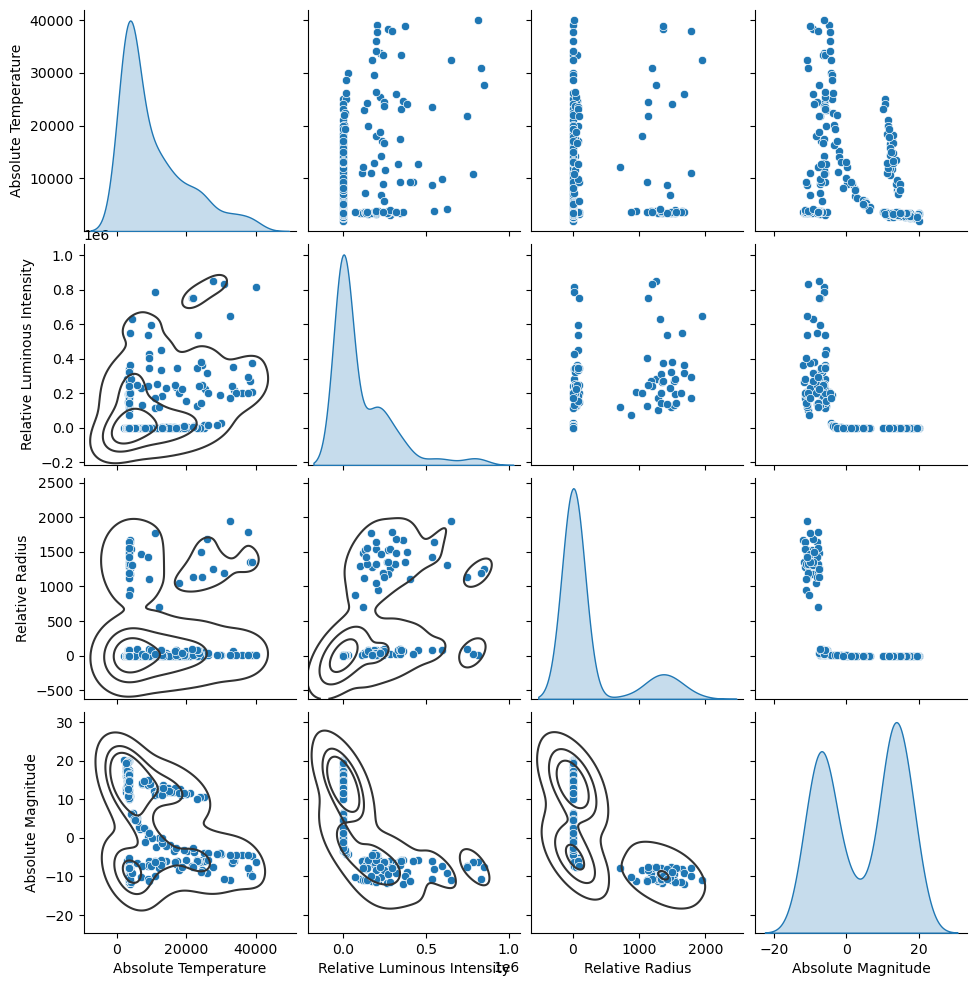

In [70]:
graph = sns.pairplot(df[numeric_var], diag_kind = "kde")
graph.map_lower(sns.kdeplot, levels = 4, color = ".2")
plt.show()

<h2> 2.12 BI-VARIATE ANALYSIS USING STRIP PLOT </h2>

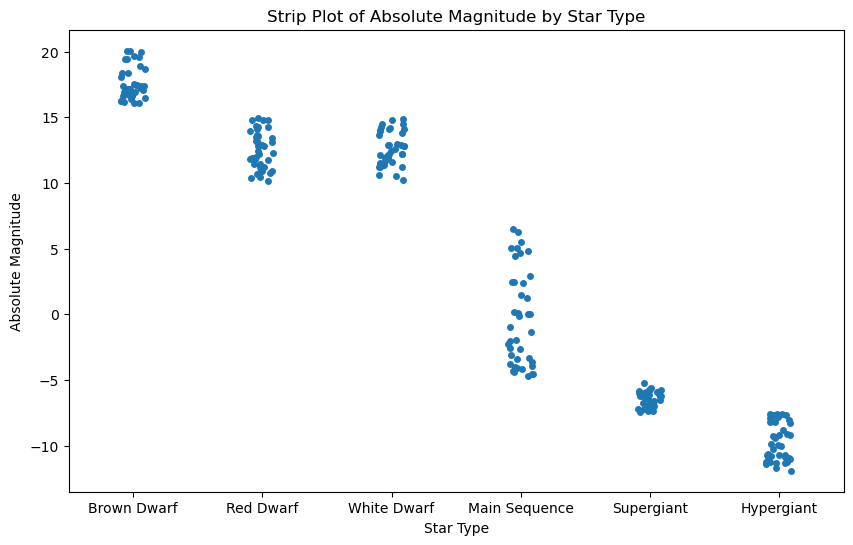

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.stripplot(x='Star Type', y='Absolute Magnitude', data=df, jitter=True)
plt.title('Strip Plot of Absolute Magnitude by Star Type')
plt.xlabel('Star Type')
plt.ylabel('Absolute Magnitude')
plt.show()


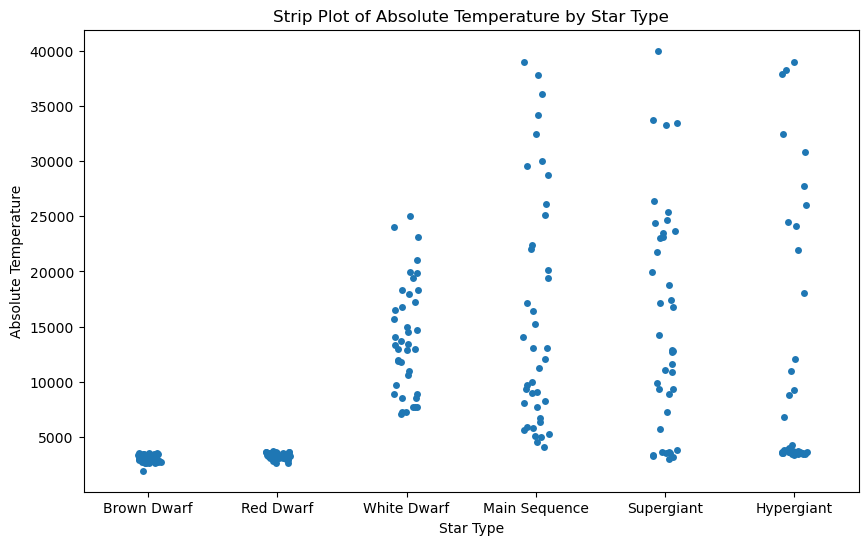

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.stripplot(x='Star Type', y='Absolute Temperature', data=df, jitter=True)
plt.title('Strip Plot of Absolute Temperature by Star Type')
plt.xlabel('Star Type')
plt.ylabel('Absolute Temperature')
plt.show()


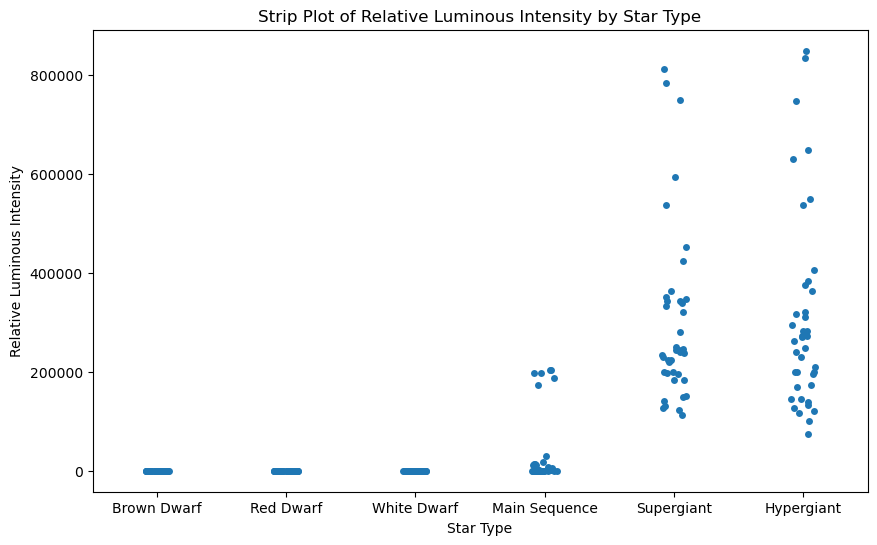

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.stripplot(x='Star Type', y='Relative Luminous Intensity', data=df, jitter=True)
plt.title('Strip Plot of Relative Luminous Intensity by Star Type')
plt.xlabel('Star Type')
plt.ylabel('Relative Luminous Intensity')
plt.show()


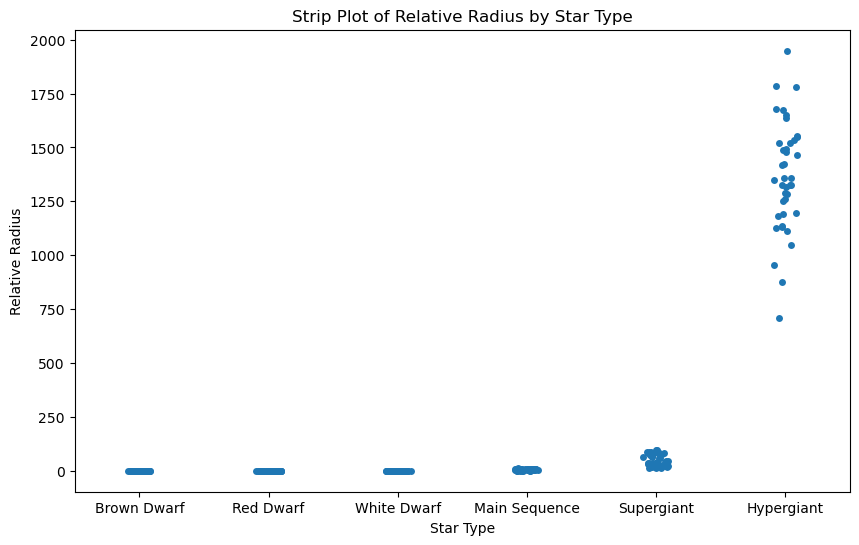

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.stripplot(x='Star Type', y='Relative Radius', data=df, jitter=True)
plt.title('Strip Plot of Relative Radius by Star Type')
plt.xlabel('Star Type')
plt.ylabel('Relative Radius')
plt.show()


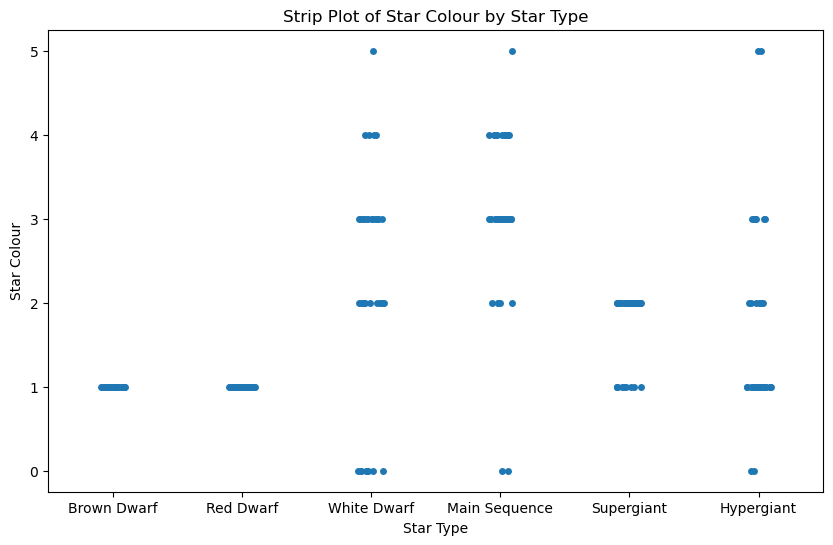

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.stripplot(x='Star Type', y='Star Colour', data=df, jitter=True)
plt.title('Strip Plot of Star Colour by Star Type')
plt.xlabel('Star Type')
plt.ylabel('Star Colour')
plt.show()


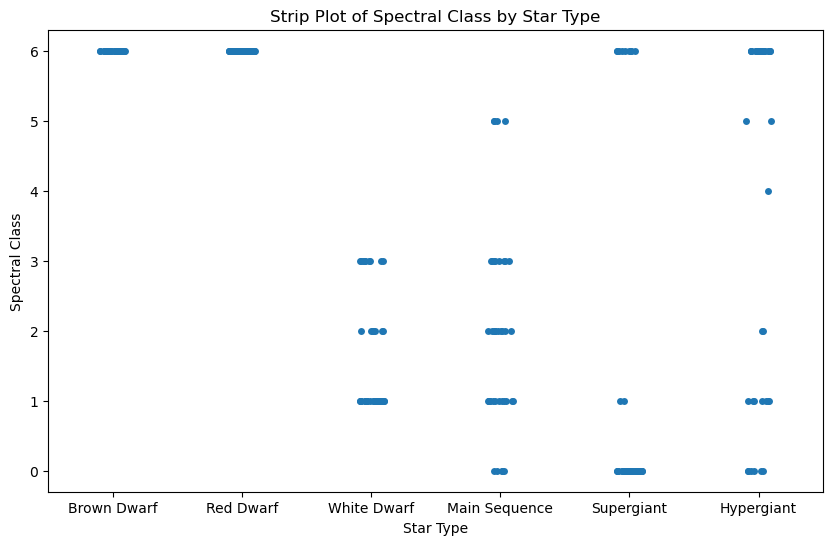

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.stripplot(x='Star Type', y='Spectral Class', data=df, jitter=True)
plt.title('Strip Plot of Spectral Class by Star Type')
plt.xlabel('Star Type')
plt.ylabel('Spectral Class')
plt.show()


<h2> 2.13 BI VARIATE ANALYSIS USING BOX PLOT </h2>

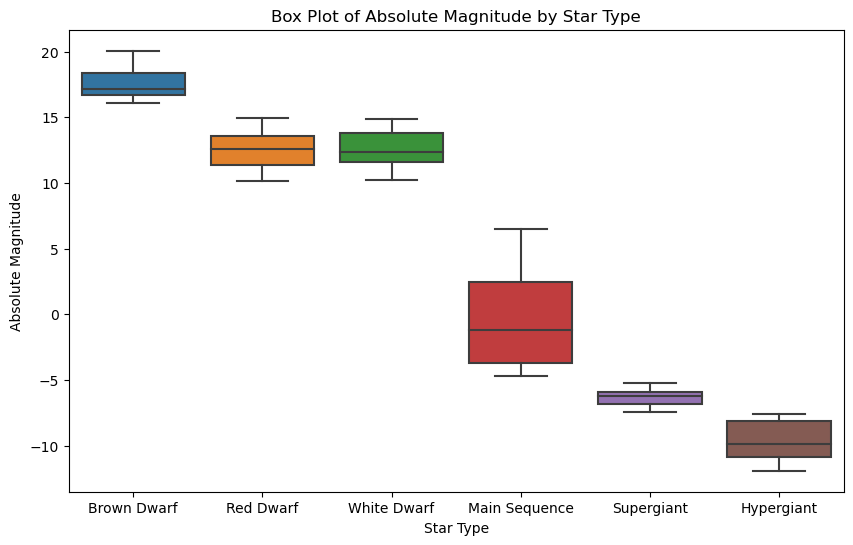

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Star Type', y='Absolute Magnitude', data=df)
plt.title('Box Plot of Absolute Magnitude by Star Type')
plt.xlabel('Star Type')
plt.ylabel('Absolute Magnitude')
plt.show()


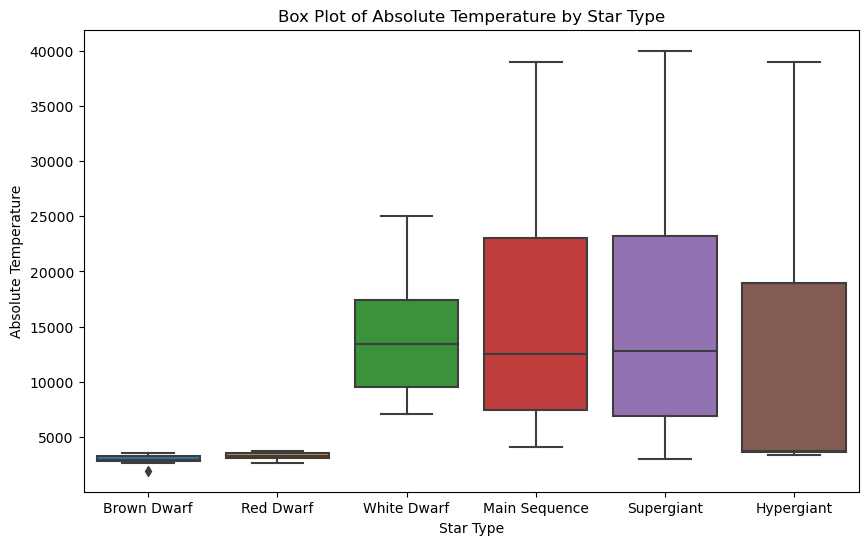

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Star Type', y='Absolute Temperature', data=df)
plt.title('Box Plot of Absolute Temperature by Star Type')
plt.xlabel('Star Type')
plt.ylabel('Absolute Temperature')
plt.show()


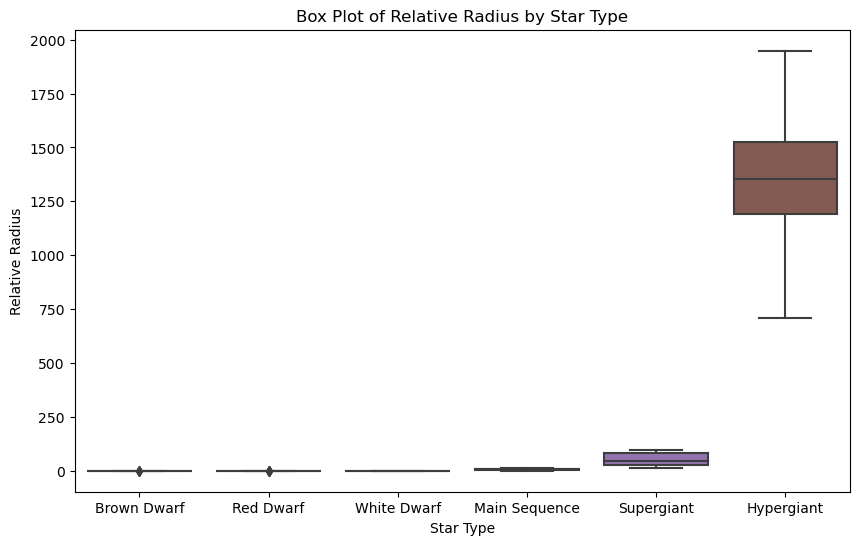

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Star Type', y='Relative Radius', data=df)
plt.title('Box Plot of Relative Radius by Star Type')
plt.xlabel('Star Type')
plt.ylabel('Relative Radius')
plt.show()


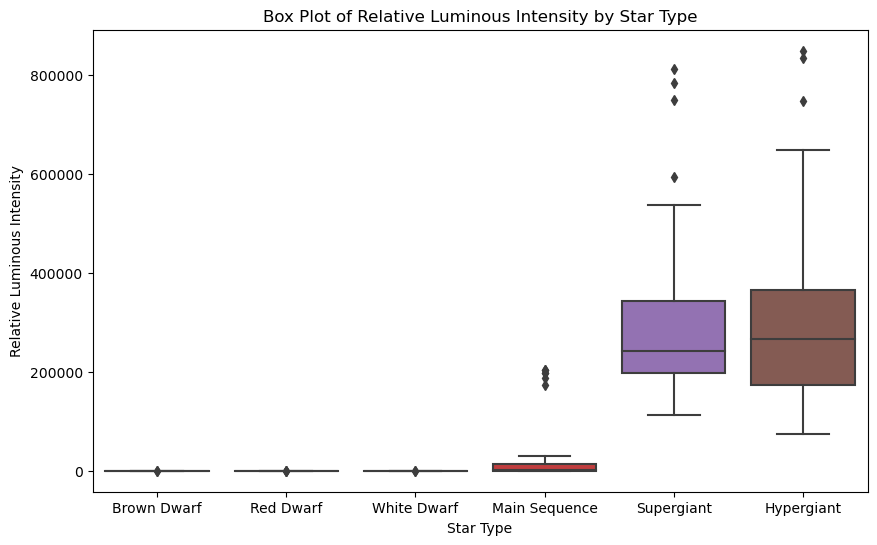

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Star Type', y='Relative Luminous Intensity', data=df)
plt.title('Box Plot of Relative Luminous Intensity by Star Type')
plt.xlabel('Star Type')
plt.ylabel('Relative Luminous Intensity')
plt.show()


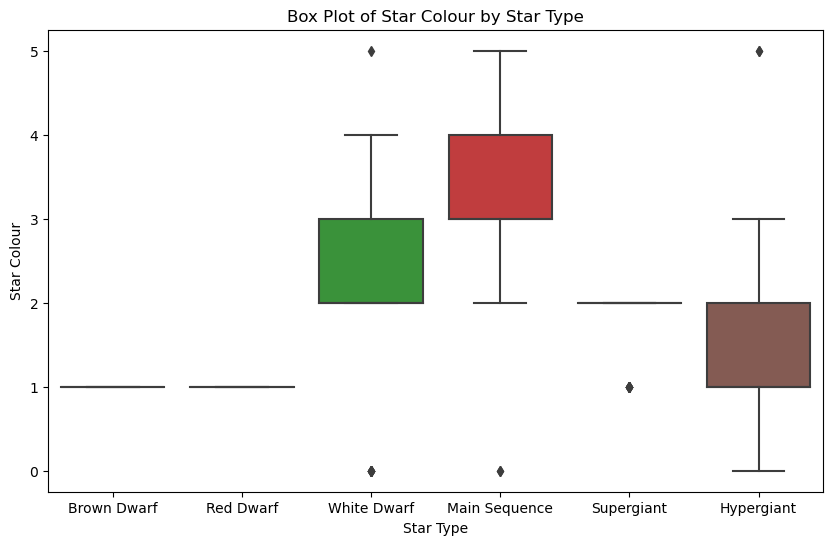

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Star Type', y='Star Colour', data=df)
plt.title('Box Plot of Star Colour by Star Type')
plt.xlabel('Star Type')
plt.ylabel('Star Colour')
plt.show()


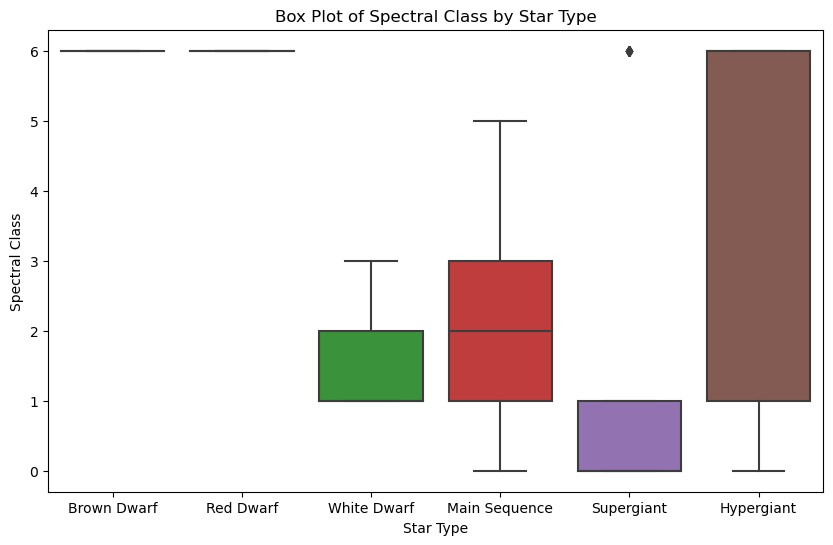

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Star Type', y='Spectral Class', data=df)
plt.title('Box Plot of Spectral Class by Star Type')
plt.xlabel('Star Type')
plt.ylabel('Spectral Class')
plt.show()


<h2> 2.14 CORRELATION ANALYSIS </h2>

In [83]:
df.head()

,Absolute Temperature,Relative Luminous Intensity,Relative Radius,Absolute Magnitude,Star Colour,Spectral Class,Star Type
0,3068,0.002400,0.1700,16.12,1,6,Brown Dwarf
1,3042,0.000500,0.1542,16.60,1,6,Brown Dwarf
2,2600,0.000300,0.1020,18.70,1,6,Brown Dwarf
3,2800,0.000200,0.1600,16.65,1,6,Brown Dwarf
4,1939,0.000138,0.1030,20.06,1,6,Brown Dwarf


In [84]:
df

,Absolute Temperature,Relative Luminous Intensity,Relative Radius,Absolute Magnitude,Star Colour,Spectral Class,Star Type
0,3068,0.002400,0.1700,16.12,1,6,Brown Dwarf
1,3042,0.000500,0.1542,16.60,1,6,Brown Dwarf
2,2600,0.000300,0.1020,18.70,1,6,Brown Dwarf
3,2800,0.000200,0.1600,16.65,1,6,Brown Dwarf
4,1939,0.000138,0.1030,20.06,1,6,Brown Dwarf
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,2,0,Hypergiant
236,30839,834042.000000,1194.0000,-10.63,2,0,Hypergiant
237,8829,537493.000000,1423.0000,-10.73,0,2,Hypergiant
238,9235,404940.000000,1112.0000,-11.23,0,2,Hypergiant


Correlation Matrix:
                             Absolute Temperature  \
Absolute Temperature                     1.000000   
Relative Luminous Intensity              0.393404   
Relative Radius                          0.064216   
Absolute Magnitude                      -0.420261   
Star Colour                              0.365525   
Spectral Class                          -0.817444   

                             Relative Luminous Intensity  Relative Radius  \
Absolute Temperature                            0.393404         0.064216   
Relative Luminous Intensity                     1.000000         0.526516   
Relative Radius                                 0.526516         1.000000   
Absolute Magnitude                             -0.692619        -0.608728   
Star Colour                                     0.072183        -0.057255   
Spectral Class                                 -0.346568         0.060728   

                             Absolute Magnitude  Star Colour  Spectr

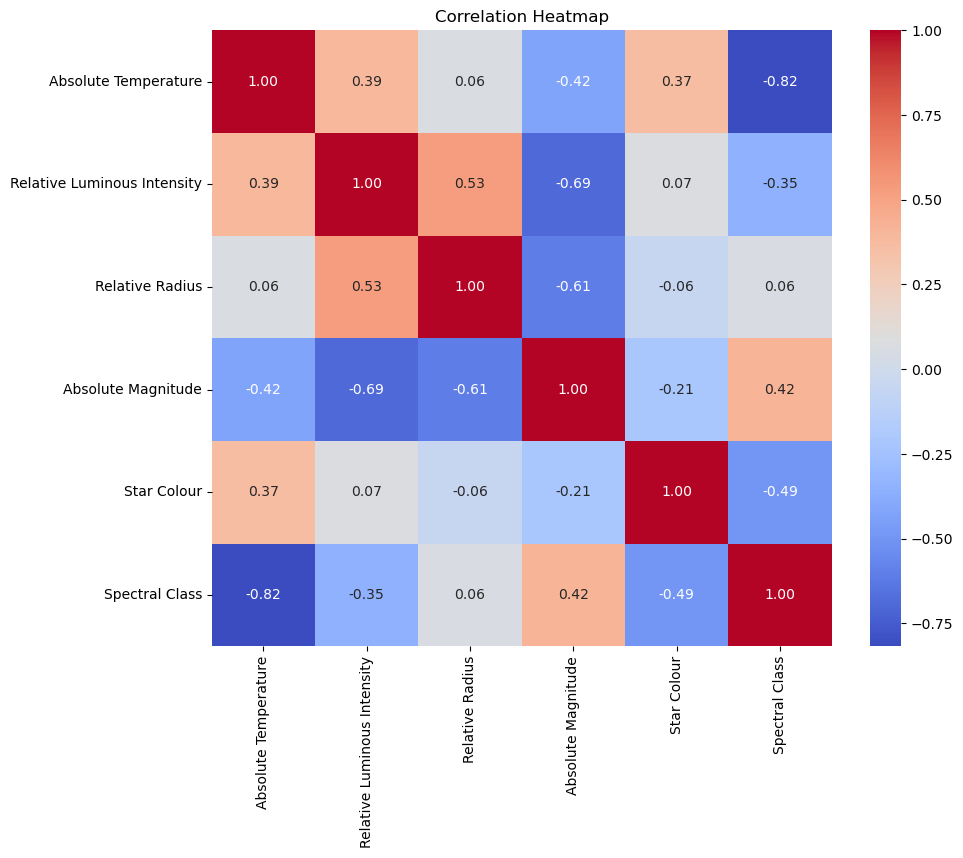

In [85]:
import pandas as pd

# Assuming you have loaded your dataset into a DataFrame called 'df'

# Perform correlation analysis
correlation_matrix = df.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# If you want to visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


<h2> 2.13 Z- SCORE NORMALISATION </h2> 

In [86]:
import numpy as np

# Function to perform Z-score normalization
def z_score_normalization(column):
    """
    Perform Z-score normalization on a given column.
    
    Parameters:
        column (pandas.Series): The column to be normalized.
        
    Returns:
        normalized_column (pandas.Series): The normalized column.
    """
    mean = np.mean(column)
    std_dev = np.std(column)
    normalized_column = (column - mean) / std_dev
    print(normalized_column)
    return normalized_column

# Assuming 'df' is your DataFrame and 'changed_column_name' is the changed column you want to normalize
changed_column_name = 'Absolute Temperature'  # Replace with the correct column name
df[changed_column_name] = z_score_normalization(df[changed_column_name])

# Display the DataFrame with the updated column

df

0     -0.779382
1     -0.782110
2     -0.828477
3     -0.807496
4     -0.897819
         ...   
235    2.983743
236    2.133913
237   -0.175029
238   -0.132438
239    2.872754
Name: Absolute Temperature, Length: 240, dtype: float64


,Absolute Temperature,Relative Luminous Intensity,Relative Radius,Absolute Magnitude,Star Colour,Spectral Class,Star Type
0,-0.779382,0.002400,0.1700,16.12,1,6,Brown Dwarf
1,-0.782110,0.000500,0.1542,16.60,1,6,Brown Dwarf
2,-0.828477,0.000300,0.1020,18.70,1,6,Brown Dwarf
3,-0.807496,0.000200,0.1600,16.65,1,6,Brown Dwarf
4,-0.897819,0.000138,0.1030,20.06,1,6,Brown Dwarf
...,...,...,...,...,...,...,...
235,2.983743,374830.000000,1356.0000,-9.93,2,0,Hypergiant
236,2.133913,834042.000000,1194.0000,-10.63,2,0,Hypergiant
237,-0.175029,537493.000000,1423.0000,-10.73,0,2,Hypergiant
238,-0.132438,404940.000000,1112.0000,-11.23,0,2,Hypergiant


In [87]:
import numpy as np

# Function to perform Z-score normalization
def z_score_normalization(column):
    """
    Perform Z-score normalization on a given column.
    
    Parameters:
        column (pandas.Series): The column to be normalized.
        
    Returns:
        normalized_column (pandas.Series): The normalized column.
    """
    mean = np.mean(column)
    std_dev = np.std(column)
    normalized_column = (column - mean) / std_dev
    print(normalized_column)
    return normalized_column

# Assuming 'df' is your DataFrame and 'changed_column_name' is the changed column you want to normalize
changed_column_name = 'Relative Luminous Intensity'  # Replace with the correct column name
df[changed_column_name] = z_score_normalization(df[changed_column_name])

# Display the DataFrame with the updated column

df

0     -0.598624
1     -0.598624
2     -0.598624
3     -0.598624
4     -0.598624
         ...   
235    1.494720
236    4.059319
237    2.403157
238    1.662878
239    1.048345
Name: Relative Luminous Intensity, Length: 240, dtype: float64


,Absolute Temperature,Relative Luminous Intensity,Relative Radius,Absolute Magnitude,Star Colour,Spectral Class,Star Type
0,-0.779382,-0.598624,0.1700,16.12,1,6,Brown Dwarf
1,-0.782110,-0.598624,0.1542,16.60,1,6,Brown Dwarf
2,-0.828477,-0.598624,0.1020,18.70,1,6,Brown Dwarf
3,-0.807496,-0.598624,0.1600,16.65,1,6,Brown Dwarf
4,-0.897819,-0.598624,0.1030,20.06,1,6,Brown Dwarf
...,...,...,...,...,...,...,...
235,2.983743,1.494720,1356.0000,-9.93,2,0,Hypergiant
236,2.133913,4.059319,1194.0000,-10.63,2,0,Hypergiant
237,-0.175029,2.403157,1423.0000,-10.73,0,2,Hypergiant
238,-0.132438,1.662878,1112.0000,-11.23,0,2,Hypergiant


In [88]:
import numpy as np

# Function to perform Z-score normalization
def z_score_normalization(column):
    """
    Perform Z-score normalization on a given column.
    
    Parameters:
        column (pandas.Series): The column to be normalized.
        
    Returns:
        normalized_column (pandas.Series): The normalized column.
    """
    mean = np.mean(column)
    std_dev = np.std(column)
    normalized_column = (column - mean) / std_dev
    print(normalized_column)
    return normalized_column

# Assuming 'df' is your DataFrame and 'changed_column_name' is the changed column you want to normalize
changed_column_name = 'Relative Radius'  # Replace with the correct column name
df[changed_column_name] = z_score_normalization(df[changed_column_name])

# Display the DataFrame with the updated column

df

0     -0.459210
1     -0.459241
2     -0.459342
3     -0.459229
4     -0.459340
         ...   
235    2.167974
236    1.854068
237    2.297800
238    1.695177
239    2.995370
Name: Relative Radius, Length: 240, dtype: float64


,Absolute Temperature,Relative Luminous Intensity,Relative Radius,Absolute Magnitude,Star Colour,Spectral Class,Star Type
0,-0.779382,-0.598624,-0.459210,16.12,1,6,Brown Dwarf
1,-0.782110,-0.598624,-0.459241,16.60,1,6,Brown Dwarf
2,-0.828477,-0.598624,-0.459342,18.70,1,6,Brown Dwarf
3,-0.807496,-0.598624,-0.459229,16.65,1,6,Brown Dwarf
4,-0.897819,-0.598624,-0.459340,20.06,1,6,Brown Dwarf
...,...,...,...,...,...,...,...
235,2.983743,1.494720,2.167974,-9.93,2,0,Hypergiant
236,2.133913,4.059319,1.854068,-10.63,2,0,Hypergiant
237,-0.175029,2.403157,2.297800,-10.73,0,2,Hypergiant
238,-0.132438,1.662878,1.695177,-11.23,0,2,Hypergiant


In [89]:
import numpy as np

# Function to perform Z-score normalization
def z_score_normalization(column):
    """
    Perform Z-score normalization on a given column.
    
    Parameters:
        column (pandas.Series): The column to be normalized.
        
    Returns:
        normalized_column (pandas.Series): The normalized column.
    """
    mean = np.mean(column)
    std_dev = np.std(column)
    normalized_column = (column - mean) / std_dev
    print(normalized_column)
    return normalized_column

# Assuming 'df' is your DataFrame and 'changed_column_name' is the changed column you want to normalize
changed_column_name = 'Absolute Magnitude'  # Replace with the correct column name
df[changed_column_name] = z_score_normalization(df[changed_column_name])

# Display the DataFrame with the updated column

df

0      1.116745
1      1.162414
2      1.362213
3      1.167171
4      1.491607
         ...   
235   -1.361718
236   -1.428317
237   -1.437832
238   -1.485403
239   -1.159064
Name: Absolute Magnitude, Length: 240, dtype: float64


,Absolute Temperature,Relative Luminous Intensity,Relative Radius,Absolute Magnitude,Star Colour,Spectral Class,Star Type
0,-0.779382,-0.598624,-0.459210,1.116745,1,6,Brown Dwarf
1,-0.782110,-0.598624,-0.459241,1.162414,1,6,Brown Dwarf
2,-0.828477,-0.598624,-0.459342,1.362213,1,6,Brown Dwarf
3,-0.807496,-0.598624,-0.459229,1.167171,1,6,Brown Dwarf
4,-0.897819,-0.598624,-0.459340,1.491607,1,6,Brown Dwarf
...,...,...,...,...,...,...,...
235,2.983743,1.494720,2.167974,-1.361718,2,0,Hypergiant
236,2.133913,4.059319,1.854068,-1.428317,2,0,Hypergiant
237,-0.175029,2.403157,2.297800,-1.437832,0,2,Hypergiant
238,-0.132438,1.662878,1.695177,-1.485403,0,2,Hypergiant


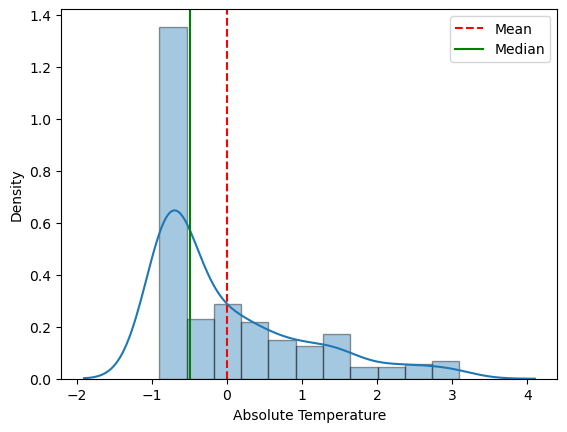

In [90]:
# Plot the distribution with seaborn
sns.distplot(df["Absolute Temperature"], hist_kws=dict(linewidth=1, edgecolor="k"))

# Calculate mean and median
mean_value = df["Absolute Temperature"].mean()
median_value = df["Absolute Temperature"].median()

# Add mean line with a different color
plt.axvline(mean_value, color='r', linestyle='--', label='Mean')

# Add median line with a different color
plt.axvline(median_value, color='g', linestyle='-', label='Median')

# Add legend
plt.legend()

# Show the plot
plt.show()

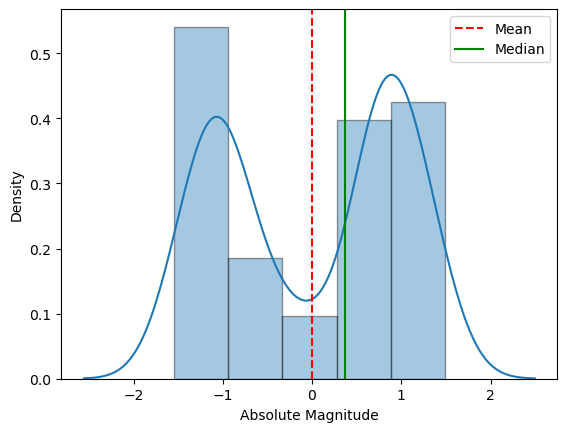

In [91]:
# Plot the distribution with seaborn
sns.distplot(df["Absolute Magnitude"], hist_kws=dict(linewidth=1, edgecolor="k"))

# Calculate mean and median
mean_value = df["Absolute Magnitude"].mean()
median_value = df["Absolute Magnitude"].median()

# Add mean line with a different color
plt.axvline(mean_value, color='r', linestyle='--', label='Mean')

# Add median line with a different color
plt.axvline(median_value, color='g', linestyle='-', label='Median')

# Add legend
plt.legend()

# Show the plot
plt.show()

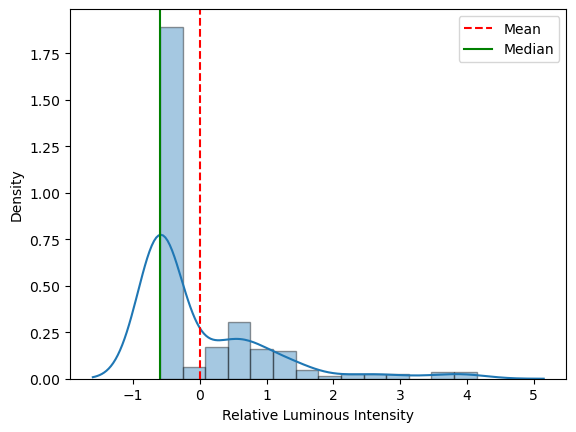

In [92]:
# Plot the distribution with seaborn
sns.distplot(df["Relative Luminous Intensity"], hist_kws=dict(linewidth=1, edgecolor="k"))

# Calculate mean and median
mean_value = df["Relative Luminous Intensity"].mean()
median_value = df["Relative Luminous Intensity"].median()

# Add mean line with a different color
plt.axvline(mean_value, color='r', linestyle='--', label='Mean')

# Add median line with a different color
plt.axvline(median_value, color='g', linestyle='-', label='Median')

# Add legend
plt.legend()

# Show the plot
plt.show()

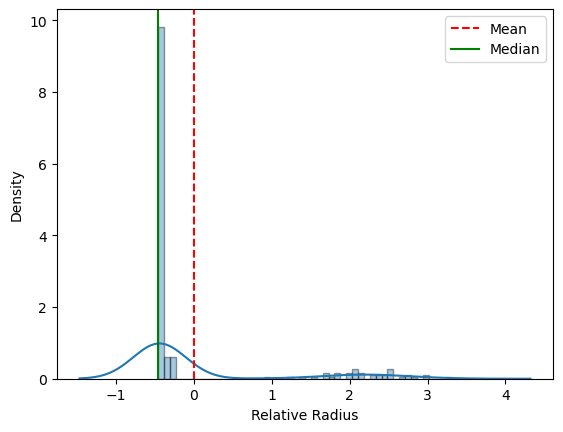

In [93]:
# Plot the distribution with seaborn
sns.distplot(df["Relative Radius"], hist_kws=dict(linewidth=1, edgecolor="k"))

# Calculate mean and median
mean_value = df["Relative Radius"].mean()
median_value = df["Relative Radius"].median()

# Add mean line with a different color
plt.axvline(mean_value, color='r', linestyle='--', label='Mean')

# Add median line with a different color
plt.axvline(median_value, color='g', linestyle='-', label='Median')

# Add legend
plt.legend()

# Show the plot
plt.show()

<h1> 3. CLASSIFICATION ALGORITHM- GAUSSIAN NAIVE BAYES </h2>

In [94]:
df

,Absolute Temperature,Relative Luminous Intensity,Relative Radius,Absolute Magnitude,Star Colour,Spectral Class,Star Type
0,-0.779382,-0.598624,-0.459210,1.116745,1,6,Brown Dwarf
1,-0.782110,-0.598624,-0.459241,1.162414,1,6,Brown Dwarf
2,-0.828477,-0.598624,-0.459342,1.362213,1,6,Brown Dwarf
3,-0.807496,-0.598624,-0.459229,1.167171,1,6,Brown Dwarf
4,-0.897819,-0.598624,-0.459340,1.491607,1,6,Brown Dwarf
...,...,...,...,...,...,...,...
235,2.983743,1.494720,2.167974,-1.361718,2,0,Hypergiant
236,2.133913,4.059319,1.854068,-1.428317,2,0,Hypergiant
237,-0.175029,2.403157,2.297800,-1.437832,0,2,Hypergiant
238,-0.132438,1.662878,1.695177,-1.485403,0,2,Hypergiant


In [95]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeaveOneOut, RepeatedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin


# Define a custom Gaussian Naive Bayes classifier
class CustomGaussianNB(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.classes = None
        self.class_priors = None
        self.class_means = None
        self.class_stds = None

    def fit(self, X, y):
        self.classes, counts = np.unique(y, return_counts=True)
        self.class_priors = counts / len(y)
        self.class_means = {}
        self.class_stds = {}
        for cls in self.classes:
            cls_indices = (y == cls)
            self.class_means[cls] = np.mean(X[cls_indices], axis=0)
            self.class_stds[cls] = np.std(X[cls_indices], axis=0)

    def predict(self, X):
        probs = np.zeros((len(X), len(self.classes)))
        for i, cls in enumerate(self.classes):
            probs[:, i] = np.prod(
                np.exp(-(X - self.class_means[cls]) ** 2 / (2 * self.class_stds[cls] ** 2)) /
                (np.sqrt(2 * np.pi) * self.class_stds[cls]), axis=1
            ) * self.class_priors[i]
        return self.classes[np.argmax(probs, axis=1)]


# Split the dataset into features (X) and target labels (y)
X = df.drop(columns=['Star Type']).values  # Features
y = df['Star Type'].values  # Target labels

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the Naive Bayes model
model = CustomGaussianNB()
model.fit(X_train, y_train)

# Predict labels for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Cross-validation techniques
cv_methods = ['Resubstitution', 'Hold-out', 'K-Fold', 'Leave-One-Out', 'Repeated K-Fold']

# Repeated K-Fold cross-validation
rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)
rkf_scores = cross_val_score(model, X_train, y_train, cv=rkf, scoring='accuracy')
print("\nCross-validation results:")
print("Repeated K-Fold Cross-Validation Accuracy:", np.mean(rkf_scores))

# Leave-One-Out cross-validation
loo = LeaveOneOut()
loo_scores = cross_val_score(model, X_train, y_train, cv=loo, scoring='accuracy')
print("Leave-One-Out Cross-Validation Accuracy:", np.mean(loo_scores))


Accuracy: 0.16666666666666666
Confusion Matrix:
[[ 8  0  0  0  0  0]
 [11  0  0  0  0  0]
 [ 8  0  0  0  0  0]
 [ 7  0  0  0  0  0]
 [ 8  0  0  0  0  0]
 [ 6  0  0  0  0  0]]
Precision: 0.027777777777777776
Recall: 0.16666666666666666
F1 Score: 0.047619047619047616

Cross-validation results:
Repeated K-Fold Cross-Validation Accuracy: 0.16666666666666666
Leave-One-Out Cross-Validation Accuracy: 0.16666666666666666


In [96]:
df

,Absolute Temperature,Relative Luminous Intensity,Relative Radius,Absolute Magnitude,Star Colour,Spectral Class,Star Type
0,-0.779382,-0.598624,-0.459210,1.116745,1,6,Brown Dwarf
1,-0.782110,-0.598624,-0.459241,1.162414,1,6,Brown Dwarf
2,-0.828477,-0.598624,-0.459342,1.362213,1,6,Brown Dwarf
3,-0.807496,-0.598624,-0.459229,1.167171,1,6,Brown Dwarf
4,-0.897819,-0.598624,-0.459340,1.491607,1,6,Brown Dwarf
...,...,...,...,...,...,...,...
235,2.983743,1.494720,2.167974,-1.361718,2,0,Hypergiant
236,2.133913,4.059319,1.854068,-1.428317,2,0,Hypergiant
237,-0.175029,2.403157,2.297800,-1.437832,0,2,Hypergiant
238,-0.132438,1.662878,1.695177,-1.485403,0,2,Hypergiant


In [129]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, KFold, LeaveOneOut, RepeatedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

# Split the dataset into features (X) and target labels (y)
X = df.drop(columns=['Star Type'])  # Features
y = df['Star Type']  # Target labels

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Instantiate and fit the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict labels for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate false positive rate (FPR)
tn = conf_matrix.diagonal()[:-1].sum()  # True negatives
fp = conf_matrix[:-1, -1].sum()  # False positives
fpr = fp / (fp + tn)
print("False Positive Rate:", fpr)

# Calculate error
error = 1 - accuracy
print("Error:", error)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Create a pipeline with GaussianNB
pipeline = Pipeline([('nb', GaussianNB())])

# Cross-validation techniques
cv_methods = ['Resubstitution', 'Hold-out', 'K-Fold', 'Leave-One-Out', 'Repeated K-Fold']

# Repeated K-Fold cross-validation
rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)
rkf_scores = cross_validate(pipeline, X_train, y_train, cv=rkf, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])

# Print results
print("\nCross-validation results:")
print("Repeated K-Fold Cross-Validation Accuracy:", np.mean(rkf_scores['test_accuracy']))
print("Repeated K-Fold Cross-Validation Precision:", np.mean(rkf_scores['test_precision_weighted']))
print("Repeated K-Fold Cross-Validation Recall:", np.mean(rkf_scores['test_recall_weighted']))
print("Repeated K-Fold Cross-Validation F1 Score:", np.mean(rkf_scores['test_f1_weighted']))

# Leave-One-Out cross-validation
loo = LeaveOneOut()
loo_acc = np.mean(cross_val_score(model, X_train, y_train, cv=loo))

# Resubstitution validation
resubstitution_acc = accuracy_score(y_train, model.predict(X_train))

# Print results
print("\nCross-validation results:")
print("Resubstitution Validation Accuracy:", resubstitution_acc)
print("Leave-One-Out Cross-Validation Accuracy:", loo_acc)


Accuracy: 0.9166666666666666
Confusion Matrix:
[[5 0 0 0 0 0]
 [0 6 0 0 0 0]
 [0 0 2 0 1 0]
 [0 0 0 2 0 0]
 [0 1 0 0 3 0]
 [0 0 0 0 0 4]]
False Positive Rate: 0.0
Error: 0.08333333333333337
Precision: 0.9226190476190476
Recall: 0.9166666666666666
F1 Score: 0.9141025641025641

Cross-validation results:
Repeated K-Fold Cross-Validation Accuracy: 0.9189217758985201
Repeated K-Fold Cross-Validation Precision: 0.9422149426800589
Repeated K-Fold Cross-Validation Recall: 0.9189217758985201
Repeated K-Fold Cross-Validation F1 Score: 0.915414742456286

Cross-validation results:
Resubstitution Validation Accuracy: 0.9212962962962963
Leave-One-Out Cross-Validation Accuracy: 0.9212962962962963


<h1> 4. CLASSIFICATION ALGORITHM- DECISION TREE </h1>

In [98]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [99]:
df

,Absolute Temperature,Relative Luminous Intensity,Relative Radius,Absolute Magnitude,Star Colour,Spectral Class,Star Type
0,-0.779382,-0.598624,-0.459210,1.116745,1,6,Brown Dwarf
1,-0.782110,-0.598624,-0.459241,1.162414,1,6,Brown Dwarf
2,-0.828477,-0.598624,-0.459342,1.362213,1,6,Brown Dwarf
3,-0.807496,-0.598624,-0.459229,1.167171,1,6,Brown Dwarf
4,-0.897819,-0.598624,-0.459340,1.491607,1,6,Brown Dwarf
...,...,...,...,...,...,...,...
235,2.983743,1.494720,2.167974,-1.361718,2,0,Hypergiant
236,2.133913,4.059319,1.854068,-1.428317,2,0,Hypergiant
237,-0.175029,2.403157,2.297800,-1.437832,0,2,Hypergiant
238,-0.132438,1.662878,1.695177,-1.485403,0,2,Hypergiant


Accuracy: 0.5416666666666666
Confusion Matrix:
[[0 0 0 5 0 0]
 [0 0 0 0 6 0]
 [0 0 3 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 4 0]
 [0 0 0 0 0 4]]
Error: 0.45833333333333337
Precision: 0.3821428571428571
Recall: 0.5416666666666666
F1 Score: 0.4239417989417989

Decision Tree Details:


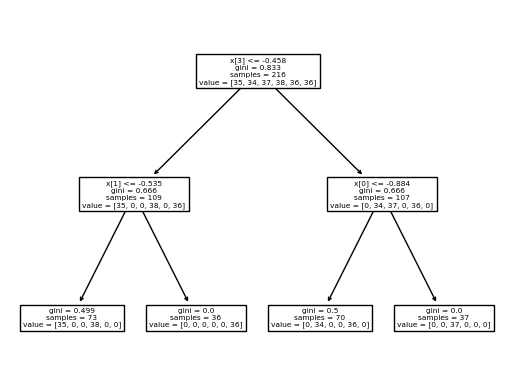


Entropy: 0.8331189986282579
Information Gain: 0.16684511595844898


In [133]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import graphviz


# Split the dataset into features (X) and target labels (y)
X = df.drop(columns=['Star Type'])  # Features
y = df['Star Type']  # Target labels

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Instantiate and fit the Decision Tree model
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)

# Predict labels for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate error
error = 1 - accuracy
print("Error:", error)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Print decision tree details
print("\nDecision Tree Details:")
tree.plot_tree(model)
plt.show()

# Print entropy and information gain
print("\nEntropy:", model.tree_.impurity[0])  # Entropy of the root node
print("Information Gain:", model.tree_.impurity[0] - model.tree_.impurity[1])  # Information gain at the first split


<h1> 4. CLASSIFICATION ALGORITHM- ID3 </h2>

In [101]:
df

,Absolute Temperature,Relative Luminous Intensity,Relative Radius,Absolute Magnitude,Star Colour,Spectral Class,Star Type
0,-0.779382,-0.598624,-0.459210,1.116745,1,6,Brown Dwarf
1,-0.782110,-0.598624,-0.459241,1.162414,1,6,Brown Dwarf
2,-0.828477,-0.598624,-0.459342,1.362213,1,6,Brown Dwarf
3,-0.807496,-0.598624,-0.459229,1.167171,1,6,Brown Dwarf
4,-0.897819,-0.598624,-0.459340,1.491607,1,6,Brown Dwarf
...,...,...,...,...,...,...,...
235,2.983743,1.494720,2.167974,-1.361718,2,0,Hypergiant
236,2.133913,4.059319,1.854068,-1.428317,2,0,Hypergiant
237,-0.175029,2.403157,2.297800,-1.437832,0,2,Hypergiant
238,-0.132438,1.662878,1.695177,-1.485403,0,2,Hypergiant


In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from math import log2

# Split the dataset into features (X) and target labels (y)
X = df.drop(columns=['Star Type'])  # Features
y = df['Star Type']  # Target labels

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Calculate entropy of a dataset
def entropy(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities))

# Calculate information gain
def information_gain(X, y, feature_name):
    unique_values = X[feature_name].unique()
    weighted_entropy = 0
    for value in unique_values:
        subset_indices = X[feature_name] == value
        subset_entropy = entropy(y[subset_indices])
        weighted_entropy += (len(y[subset_indices]) / len(y)) * subset_entropy
    return entropy(y) - weighted_entropy

# Instantiate and fit the ID3 Decision Tree model
model = DecisionTreeClassifier(criterion='entropy',max_depth=2)
model.fit(X_train, y_train)

# Predict labels for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate error
error = 1 - accuracy
print("Error:", error)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Print entropy and information gain
print("\nEntropy:", entropy(y_train))
for feature in X_train.columns:
    print("Information Gain for", feature, ":", information_gain(X_train, y_train, feature))


Accuracy: 0.5416666666666666
Confusion Matrix:
[[0 0 0 5 0 0]
 [0 0 0 0 6 0]
 [0 0 3 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 4 0]
 [0 0 0 0 0 4]]
Error: 0.45833333333333337
Precision: 0.3821428571428571
Recall: 0.5416666666666666
F1 Score: 0.4239417989417989

Entropy: 2.58403443578125
Information Gain for Absolute Temperature : 2.546997398744213
Information Gain for Relative Luminous Intensity : 2.4029260307869738
Information Gain for Relative Radius : 2.574775176521991
Information Gain for Absolute Magnitude : 2.54350254919716
Information Gain for Star Colour : 0.9851879731978359
Information Gain for Spectral Class : 1.0534687846914914


<h1> 5. OUTLIER ANALYSIS </h2>

In [103]:
df

,Absolute Temperature,Relative Luminous Intensity,Relative Radius,Absolute Magnitude,Star Colour,Spectral Class,Star Type
0,-0.779382,-0.598624,-0.459210,1.116745,1,6,Brown Dwarf
1,-0.782110,-0.598624,-0.459241,1.162414,1,6,Brown Dwarf
2,-0.828477,-0.598624,-0.459342,1.362213,1,6,Brown Dwarf
3,-0.807496,-0.598624,-0.459229,1.167171,1,6,Brown Dwarf
4,-0.897819,-0.598624,-0.459340,1.491607,1,6,Brown Dwarf
...,...,...,...,...,...,...,...
235,2.983743,1.494720,2.167974,-1.361718,2,0,Hypergiant
236,2.133913,4.059319,1.854068,-1.428317,2,0,Hypergiant
237,-0.175029,2.403157,2.297800,-1.437832,0,2,Hypergiant
238,-0.132438,1.662878,1.695177,-1.485403,0,2,Hypergiant


In [104]:
import pandas as pd

# Calculate the first and third quartiles
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Align DataFrame columns before comparison
df, lower_bound = df.align(lower_bound, axis=1, copy=False)
df, upper_bound = df.align(upper_bound, axis=1, copy=False)

# Find outliers
outliers = df[(df < lower_bound) | (df > upper_bound)].dropna()

# Print the outliers
print("Outliers:")
print(outliers)


Outliers:
Empty DataFrame
Columns: [Absolute Magnitude, Absolute Temperature, Relative Luminous Intensity, Relative Radius, Spectral Class, Star Colour, Star Type]
Index: []


In [105]:
import pandas as pd

# Select the column for which you want to perform outlier analysis
column_name = 'Absolute Temperature'  # Replace 'Your_Column_Name' with the actual column name

# Calculate the first quartile (Q1)
Q1 = df[column_name].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df[column_name].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print("Outliers:")
print(outliers)


Outliers:
     Absolute Magnitude  Absolute Temperature  Relative Luminous Intensity  \
30            -0.864122              2.990037                     0.540672   
49            -0.997322              2.439290                     0.630028   
99            -0.835579              2.686654                     0.507163   
100           -1.035379              2.392083                     0.741724   
101           -1.009690              3.094941                     3.941804   
109           -0.967827              2.404776                     1.367219   
159           -0.850802              2.864152                     0.534529   
214           -0.851754              2.485448                     0.508280   
231           -1.300826              2.909680                     0.925072   
235           -1.361718              2.983743                     1.494720   
239           -1.159064              2.872754                     1.048345   

     Relative Radius  Spectral Class  Star Colour    

In [106]:
import pandas as pd

# Select the column for which you want to perform outlier analysis
column_name = 'Relative Luminous Intensity'  # Replace 'Your_Column_Name' with the actual column name

# Calculate the first quartile (Q1)
Q1 = df[column_name].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df[column_name].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print("Outliers:")
print(outliers)


Outliers:
     Absolute Magnitude  Absolute Temperature  Relative Luminous Intensity  \
53            -1.182850             -0.707942                     2.473006   
101           -1.009690              3.094941                     3.941804   
172           -1.292263             -0.651504                     2.919789   
223           -0.985429              1.357727                     2.402806   
226           -1.107877             -0.063516                     2.718178   
227           -1.009119              0.045375                     3.779454   
229           -1.115869              1.179180                     3.583763   
232           -1.448297              2.307005                     3.022716   
233           -1.139084              1.808710                     4.145201   
234           -1.146695              1.196594                     3.581529   
236           -1.428317              2.133913                     4.059319   
237           -1.437832             -0.175029         

In [107]:
import pandas as pd

# Select the column for which you want to perform outlier analysis
column_name = 'Relative Radius'  # Replace 'Your_Column_Name' with the actual column name

# Calculate the first quartile (Q1)
Q1 = df[column_name].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df[column_name].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print("Outliers:")
print(outliers)


Outliers:
     Absolute Magnitude  Absolute Temperature  Relative Luminous Intensity  \
50            -1.311292             -0.735113                     0.909267   
51            -1.142890             -0.707837                     0.981870   
52            -1.292263             -0.699025                     0.920437   
53            -1.182850             -0.707942                     2.473006   
54            -1.158113             -0.718328                     1.132659   
55            -1.534877             -0.739309                     0.870174   
56            -1.551051             -0.717279                     1.428652   
57            -1.490160             -0.739309                     0.373128   
58            -1.486354             -0.707628                     0.568596   
59            -1.497771             -0.730392                     0.490409   
110           -1.434977             -0.738365                    -0.040145   
111           -1.445443             -0.723049         

In [108]:
import pandas as pd

# Select the column for which you want to perform outlier analysis
column_name = 'Absolute Magnitude'  # Replace 'Your_Column_Name' with the actual column name

# Calculate the first quartile (Q1)
Q1 = df[column_name].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df[column_name].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print("Outliers:")
print(outliers)

Outliers:
Empty DataFrame
Columns: [Absolute Magnitude, Absolute Temperature, Relative Luminous Intensity, Relative Radius, Spectral Class, Star Colour, Star Type]
Index: []


TypeError: Horizontal orientation requires numeric `x` variable.

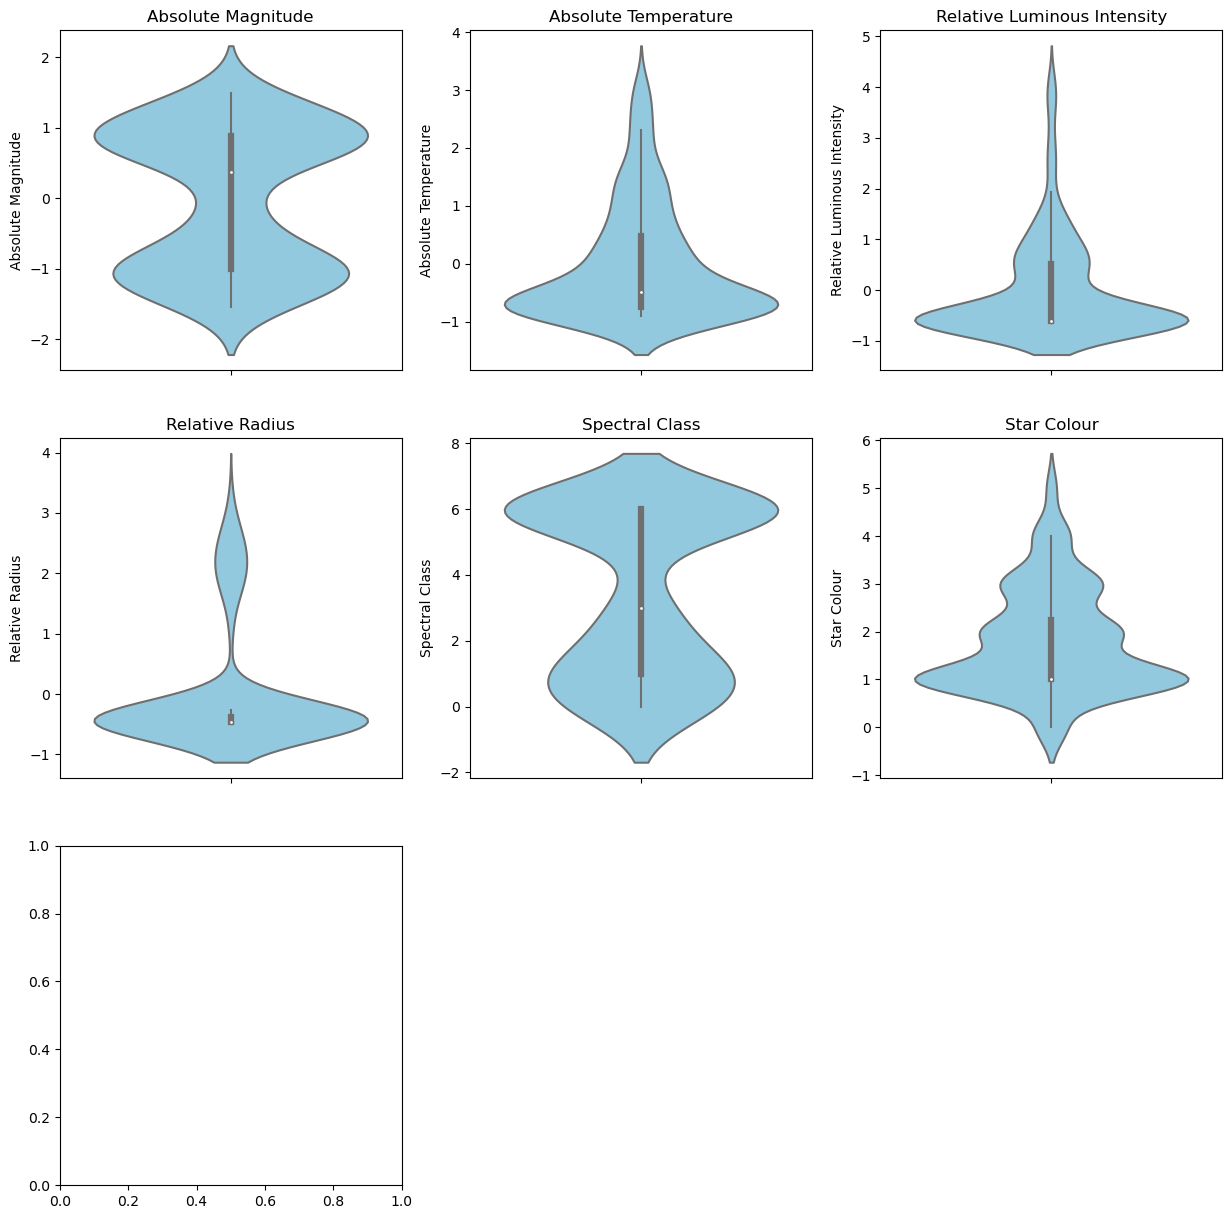

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Determine the number of rows and columns for subplots
num_cols = df.shape[1]
num_rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)

# Plot violin plots for each column
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(df.columns):
    plt.subplot(num_rows, 3, i+1)
    if df[col].dtype == 'object':
        sns.violinplot(x=df[col], color='skyblue')
    else:
        sns.violinplot(y=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()


<h1>6. HANDLING OUTLIERS USING REPLACEMENT BY MEDIAN </h2>

In [110]:
df

,Absolute Magnitude,Absolute Temperature,Relative Luminous Intensity,Relative Radius,Spectral Class,Star Colour,Star Type
0,1.116745,-0.779382,-0.598624,-0.459210,6,1,Brown Dwarf
1,1.162414,-0.782110,-0.598624,-0.459241,6,1,Brown Dwarf
2,1.362213,-0.828477,-0.598624,-0.459342,6,1,Brown Dwarf
3,1.167171,-0.807496,-0.598624,-0.459229,6,1,Brown Dwarf
4,1.491607,-0.897819,-0.598624,-0.459340,6,1,Brown Dwarf
...,...,...,...,...,...,...,...
235,-1.361718,2.983743,1.494720,2.167974,0,2,Hypergiant
236,-1.428317,2.133913,4.059319,1.854068,0,2,Hypergiant
237,-1.437832,-0.175029,2.403157,2.297800,2,0,Hypergiant
238,-1.485403,-0.132438,1.662878,1.695177,2,0,Hypergiant


In [111]:
import pandas as pd

# Select the column with outliers
column_name = 'Absolute Temperature'  # Replace 'Your_Column_Name' with the actual column name

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median of the column
median = df[column_name].median()
df[column_name] = df[column_name].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

df


,Absolute Magnitude,Absolute Temperature,Relative Luminous Intensity,Relative Radius,Spectral Class,Star Colour,Star Type
0,1.116745,-0.779382,-0.598624,-0.459210,6,1,Brown Dwarf
1,1.162414,-0.782110,-0.598624,-0.459241,6,1,Brown Dwarf
2,1.362213,-0.828477,-0.598624,-0.459342,6,1,Brown Dwarf
3,1.167171,-0.807496,-0.598624,-0.459229,6,1,Brown Dwarf
4,1.491607,-0.897819,-0.598624,-0.459340,6,1,Brown Dwarf
...,...,...,...,...,...,...,...
235,-1.361718,-0.495301,1.494720,2.167974,0,2,Hypergiant
236,-1.428317,2.133913,4.059319,1.854068,0,2,Hypergiant
237,-1.437832,-0.175029,2.403157,2.297800,2,0,Hypergiant
238,-1.485403,-0.132438,1.662878,1.695177,2,0,Hypergiant


In [112]:
import pandas as pd

# Select the column with outliers
column_name = 'Relative Luminous Intensity'  # Replace 'Your_Column_Name' with the actual column name

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median of the column
median = df[column_name].median()
df[column_name] = df[column_name].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

df


,Absolute Magnitude,Absolute Temperature,Relative Luminous Intensity,Relative Radius,Spectral Class,Star Colour,Star Type
0,1.116745,-0.779382,-0.598624,-0.459210,6,1,Brown Dwarf
1,1.162414,-0.782110,-0.598624,-0.459241,6,1,Brown Dwarf
2,1.362213,-0.828477,-0.598624,-0.459342,6,1,Brown Dwarf
3,1.167171,-0.807496,-0.598624,-0.459229,6,1,Brown Dwarf
4,1.491607,-0.897819,-0.598624,-0.459340,6,1,Brown Dwarf
...,...,...,...,...,...,...,...
235,-1.361718,-0.495301,1.494720,2.167974,0,2,Hypergiant
236,-1.428317,2.133913,-0.598623,1.854068,0,2,Hypergiant
237,-1.437832,-0.175029,-0.598623,2.297800,2,0,Hypergiant
238,-1.485403,-0.132438,1.662878,1.695177,2,0,Hypergiant


In [120]:
import pandas as pd

# Select the column with outliers
column_name = 'Relative Radius'  # Replace 'Your_Column_Name' with the actual column name

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median of the column
median = df[column_name].median()
df[column_name] = df[column_name].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

df


,Absolute Magnitude,Absolute Temperature,Relative Luminous Intensity,Relative Radius,Spectral Class,Star Colour,Star Type
0,1.116745,-0.779382,-0.598624,-0.459210,6,1,Brown Dwarf
1,1.162414,-0.782110,-0.598624,-0.459241,6,1,Brown Dwarf
2,1.362213,-0.828477,-0.598624,-0.459342,6,1,Brown Dwarf
3,1.167171,-0.807496,-0.598624,-0.459229,6,1,Brown Dwarf
4,1.491607,-0.897819,-0.598624,-0.459340,6,1,Brown Dwarf
...,...,...,...,...,...,...,...
235,-1.361718,-0.495301,1.494720,-0.458062,0,2,Hypergiant
236,-1.428317,2.133913,-0.598623,-0.458062,0,2,Hypergiant
237,-1.437832,-0.175029,-0.598623,-0.458062,2,0,Hypergiant
238,-1.485403,-0.132438,1.662878,-0.458062,2,0,Hypergiant


<h1>7. CLASSIFICATION ALGORITHM- KNN </h2>

In [114]:
df

,Absolute Magnitude,Absolute Temperature,Relative Luminous Intensity,Relative Radius,Spectral Class,Star Colour,Star Type
0,1.116745,-0.779382,-0.598624,-0.459210,6,1,Brown Dwarf
1,1.162414,-0.782110,-0.598624,-0.459241,6,1,Brown Dwarf
2,1.362213,-0.828477,-0.598624,-0.459342,6,1,Brown Dwarf
3,1.167171,-0.807496,-0.598624,-0.459229,6,1,Brown Dwarf
4,1.491607,-0.897819,-0.598624,-0.459340,6,1,Brown Dwarf
...,...,...,...,...,...,...,...
235,-1.361718,-0.495301,1.494720,-0.458062,0,2,Hypergiant
236,-1.428317,2.133913,-0.598623,-0.458062,0,2,Hypergiant
237,-1.437832,-0.175029,-0.598623,-0.458062,2,0,Hypergiant
238,-1.485403,-0.132438,1.662878,-0.458062,2,0,Hypergiant


In [137]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Define a custom KNN classifier using Euclidean distance
class KNNClassifierEuclidean:
    def __init__(self, k=7):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            distances = []
            for train_point in self.X_train:
                distance = np.linalg.norm(test_point - train_point)  # Euclidean distance
                distances.append(distance)
            # Get indices of the k nearest neighbors
            nearest_indices = np.argsort(distances)[:self.k]
            # Get labels of the k nearest neighbors
            nearest_labels = [self.y_train[i] for i in nearest_indices]
            # Predict the label based on the majority class among the nearest neighbors
            prediction = max(set(nearest_labels), key=nearest_labels.count)
            predictions.append(prediction)
        return np.array(predictions)

# Instantiate the custom KNN classifier
model_euclidean = KNNClassifierEuclidean(k=7)

# Fit the model to the training data
model_euclidean.fit(X_train.values, y_train.values)

# Predict labels for the test set
y_pred_euclidean = model_euclidean.predict(X_test.values)

# Calculate accuracy
accuracy_euclidean = (y_pred_euclidean == y_test.values).mean()
print("Accuracy (Euclidean):", accuracy_euclidean)

# Calculate confusion matrix
conf_matrix_euclidean = confusion_matrix(y_test.values, y_pred_euclidean)
print("Confusion Matrix (Euclidean):")
print(conf_matrix_euclidean)

# Calculate error
error_euclidean = 1 - accuracy_euclidean
print("Error (Euclidean):", error_euclidean)

# Calculate precision
precision_euclidean = precision_score(y_test.values, y_pred_euclidean, average='weighted')
print("Precision (Euclidean):", precision_euclidean)

# Calculate recall
recall_euclidean = recall_score(y_test.values, y_pred_euclidean, average='weighted')
print("Recall (Euclidean):", recall_euclidean)

# Calculate F1 score
f1_euclidean = f1_score(y_test.values, y_pred_euclidean, average='weighted')
print("F1 Score (Euclidean):", f1_euclidean)

# Cross-validation techniques
cv_methods = ['Resubstitution', 'Hold-out', 'K-Fold', 'Leave-One-Out', 'Repeated K-Fold']

# Resubstitution validation
resubstitution_acc = accuracy_score(y_train, model.predict(X_train))

# Hold-out validation
X_train_ho, X_val, y_train_ho, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model_ho = KNeighborsClassifier()
model_ho.fit(X_train_ho, y_train_ho)
holdout_acc = accuracy_score(y_val, model_ho.predict(X_val))

# K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kfold_acc = np.mean(cross_val_score(model, X_train, y_train, cv=kf))

# Leave-One-Out cross-validation
loo = LeaveOneOut()
loo_acc = np.mean(cross_val_score(model, X_train, y_train, cv=loo))

# Repeated K-Fold cross-validation
rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)
rkf_acc = np.mean(cross_val_score(model, X_train, y_train, cv=rkf))

# Print results
print("\nCross-validation results:")
print("Resubstitution Validation Accuracy:", resubstitution_acc)
print("Hold-Out Validation Accuracy:", holdout_acc)
print("K-Fold Cross-Validation Accuracy:", kfold_acc)
print("Leave-One-Out Cross-Validation Accuracy:", loo_acc)
print("Repeated K-Fold Cross-Validation Accuracy:", rkf_acc)



Accuracy (Euclidean): 0.75
Confusion Matrix (Euclidean):
[[5 0 0 0 0 0]
 [0 2 2 0 2 0]
 [0 0 2 0 1 0]
 [0 0 0 2 0 0]
 [0 1 0 0 3 0]
 [0 0 0 0 0 4]]
Error (Euclidean): 0.25
Precision (Euclidean): 0.7708333333333334
Recall (Euclidean): 0.75
F1 Score (Euclidean): 0.7408730158730158

Cross-validation results:
Resubstitution Validation Accuracy: 0.9027777777777778
Hold-Out Validation Accuracy: 0.8181818181818182
K-Fold Cross-Validation Accuracy: 0.8381606765327696
Leave-One-Out Cross-Validation Accuracy: 0.8518518518518519
Repeated K-Fold Cross-Validation Accuracy: 0.8449788583509514


In [116]:
df

,Absolute Magnitude,Absolute Temperature,Relative Luminous Intensity,Relative Radius,Spectral Class,Star Colour,Star Type
0,1.116745,-0.779382,-0.598624,-0.459210,6,1,Brown Dwarf
1,1.162414,-0.782110,-0.598624,-0.459241,6,1,Brown Dwarf
2,1.362213,-0.828477,-0.598624,-0.459342,6,1,Brown Dwarf
3,1.167171,-0.807496,-0.598624,-0.459229,6,1,Brown Dwarf
4,1.491607,-0.897819,-0.598624,-0.459340,6,1,Brown Dwarf
...,...,...,...,...,...,...,...
235,-1.361718,-0.495301,1.494720,-0.458062,0,2,Hypergiant
236,-1.428317,2.133913,-0.598623,-0.458062,0,2,Hypergiant
237,-1.437832,-0.175029,-0.598623,-0.458062,2,0,Hypergiant
238,-1.485403,-0.132438,1.662878,-0.458062,2,0,Hypergiant


In [136]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeaveOneOut, RepeatedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier


# Split the dataset into features (X) and target labels (y)
X = df.drop(columns=['Star Type'])  # Features
y = df['Star Type']  # Target labels

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Instantiate and fit the KNN model
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

# Predict labels for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate error
error = 1 - accuracy
print("Error:", error)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate false positive rate (FPR)
tn = conf_matrix.diagonal()[:-1].sum()  # True negatives
fp = conf_matrix[:-1, -1].sum()  # False positives
fpr = fp / (fp + tn)
print("False Positive Rate:", fpr)

# Cross-validation techniques
cv_methods = ['Resubstitution', 'Hold-out', 'K-Fold', 'Leave-One-Out', 'Repeated K-Fold']

# Resubstitution validation
resubstitution_acc = accuracy_score(y_train, model.predict(X_train))

# Hold-out validation
X_train_ho, X_val, y_train_ho, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
model_ho = KNeighborsClassifier()
model_ho.fit(X_train_ho, y_train_ho)
holdout_acc = accuracy_score(y_val, model_ho.predict(X_val))

# K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kfold_acc = np.mean(cross_val_score(model, X_train, y_train, cv=kf))

# Leave-One-Out cross-validation
loo = LeaveOneOut()
loo_acc = np.mean(cross_val_score(model, X_train, y_train, cv=loo))

# Repeated K-Fold cross-validation
rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)
rkf_acc = np.mean(cross_val_score(model, X_train, y_train, cv=rkf))

# Print results
print("\nCross-validation results:")
print("Resubstitution Validation Accuracy:", resubstitution_acc)
print("Hold-Out Validation Accuracy:", holdout_acc)
print("K-Fold Cross-Validation Accuracy:", kfold_acc)
print("Leave-One-Out Cross-Validation Accuracy:", loo_acc)
print("Repeated K-Fold Cross-Validation Accuracy:", rkf_acc)


Accuracy: 0.7916666666666666
Confusion Matrix:
[[5 0 0 0 0 0]
 [0 2 2 0 2 0]
 [0 0 3 0 0 0]
 [0 0 0 2 0 0]
 [0 1 0 0 3 0]
 [0 0 0 0 0 4]]
Error: 0.20833333333333337
Precision: 0.8000000000000002
Recall: 0.7916666666666666
F1 Score: 0.7743055555555555
False Positive Rate: 0.0

Cross-validation results:
Resubstitution Validation Accuracy: 0.9027777777777778
Hold-Out Validation Accuracy: 0.7727272727272727
K-Fold Cross-Validation Accuracy: 0.8381606765327696
Leave-One-Out Cross-Validation Accuracy: 0.8518518518518519
Repeated K-Fold Cross-Validation Accuracy: 0.8449788583509514
